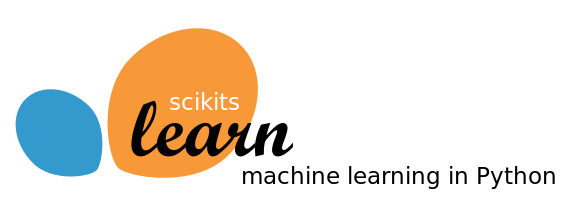

* sklearn官网：https://scikit-learn.org/stable/index.html
* scikit-learn中文社区：https://scikit-learn.org.cn/

Scikit-learn是一个基于Python的开源机器学习库，它基于NumPy、SciPy和matplotlib，支持各种机器学习模型，包括分类、回归、聚类和降维等。除了提供大量的机器学习算法外，Scikit-learn还包括了一整套模型评估和选择的工具，以及数据预处理和数据分析的功能。简单易用却功能强大，是Scikit-learn受欢迎的重要原因。

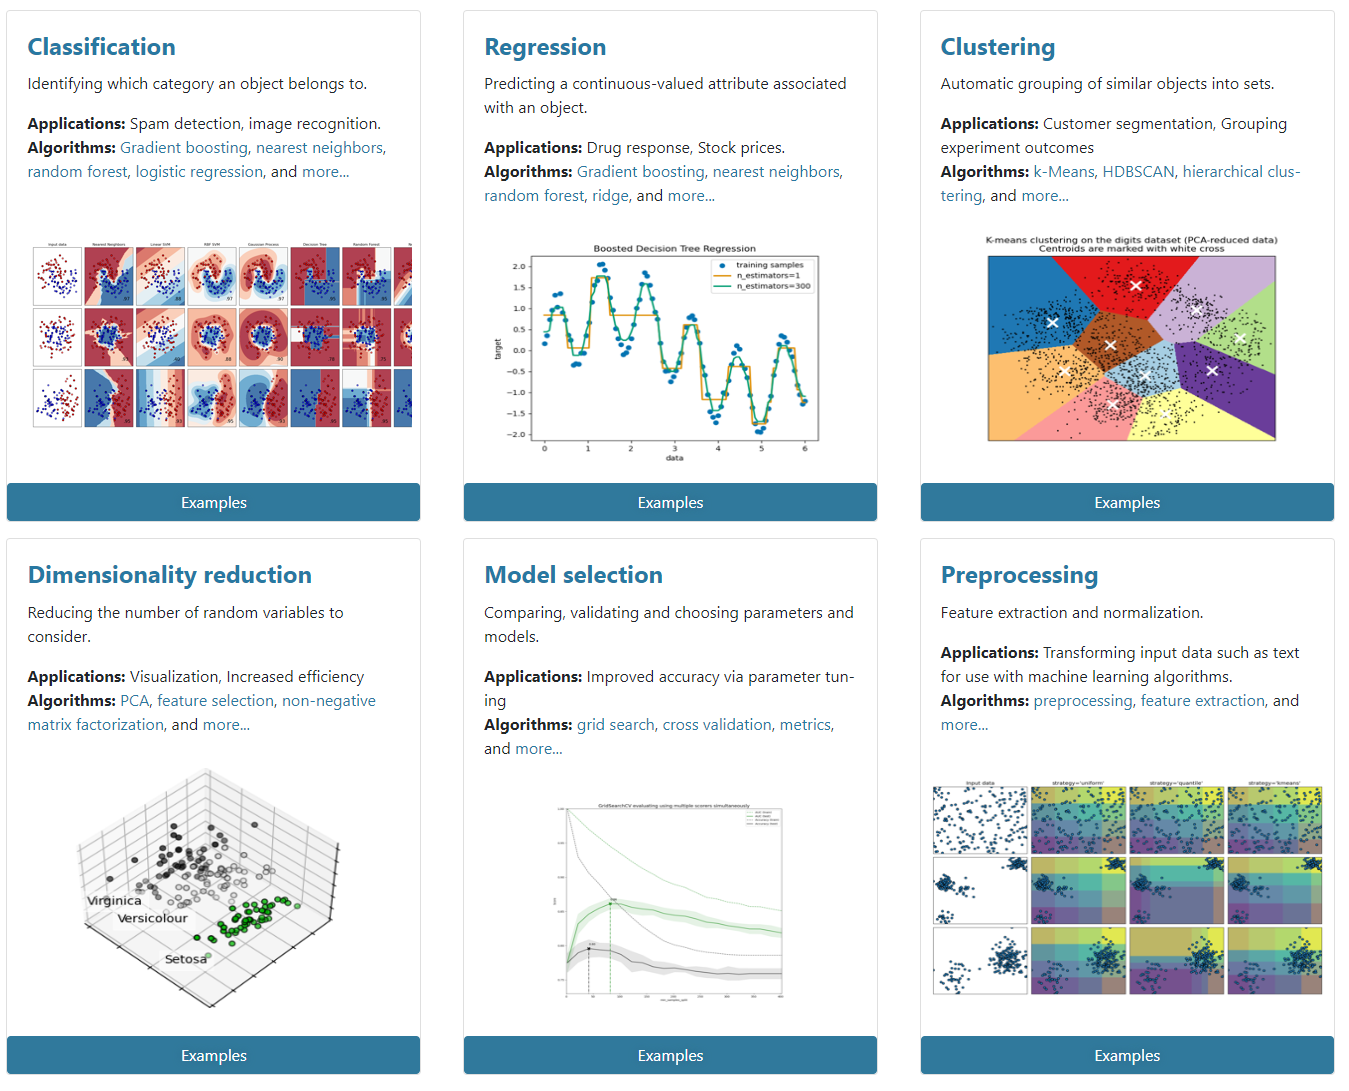

* 模块preprocessing：几乎包含数据预处理的所有内容
* 模块feature_selection：包含特征选择的各种算法实践
* 模块decomposition: 包含降维算法
* 模块model_selection: 包括模型验证各种方法
* 模块impute：填补缺失值
* 其他模块包含分类、回归、聚类等问题的各种机器学习模型

**sklearn基本建模流程**

* 1.实例化，建立评估模型对象
* 2.通过模型接口transform训练模型
* 3.通过模型接口获取需要信息（测试数据等）

```
Example

from sklearn.tree import RandomForestClassifier          # 导入需要的模块
rfc = RandomForestClassifier()                     # 实例化
rfc = rfc.fit(X_train,y_train)                     # 用训练集数据训练模型
result = rfc.score(X_test,y_test)                   # 导入测试集，从接口中调用需要的信息
```

In [1]:
# !pip install -U scikit-learn

In [2]:
# !pip install numpy Cython
# !pip install -U pymrmr

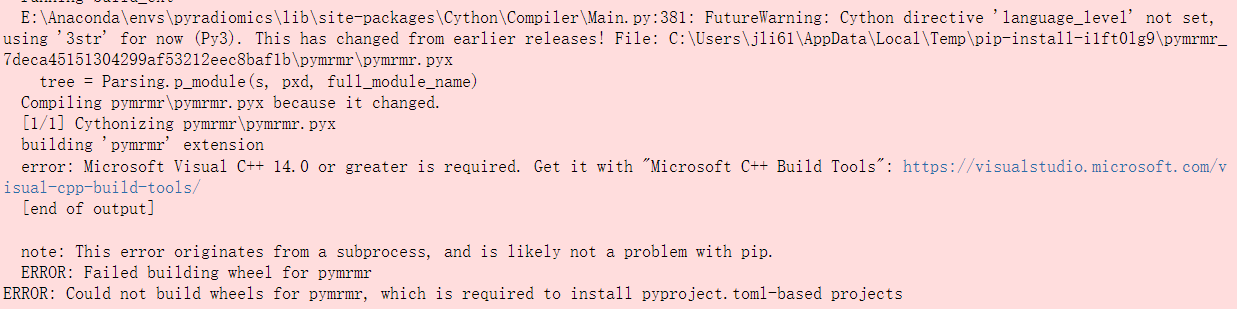

https://visualstudio.microsoft.com/zh-hans/

# 导入库

In [87]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 模型
from sklearn.ensemble import RandomForestClassifier as RFC # 随机森林算法
from sklearn.svm import SVC,LinearSVC # 支持向量机算法
from sklearn.linear_model import LogisticRegression # 逻辑回归算法
from sklearn.ensemble import GradientBoostingClassifier as GBC # 梯度提升机算法

# 特征选择
from sklearn.feature_selection import SelectKBest # 用来选择k个特征最高的类

# 过滤法
from sklearn.feature_selection import VarianceThreshold # 方差过滤
from sklearn.feature_selection import f_classif # one-way ANOVA
import pymrmr # 最小冗余最大相关 mRMR

# 包装法
from sklearn.feature_selection import RFE # 递归特征消除
from sklearn.feature_selection import RFECV # 递归特征消除+交叉验证

# 嵌入法
from sklearn.feature_selection import SelectFromModel # 嵌入法
from sklearn.linear_model import LogisticRegressionCV # LASSO

# 模型验证
from sklearn.model_selection import cross_val_score # 交叉验证
from sklearn.model_selection import GridSearchCV # 网格搜索

#模型评价
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

# 路径

In [2]:
# 输入路径
path_input = r'D:\FJMU_course\Chapter_8\BraTs18\lecture_1'
os.chdir(path_input)
os.getcwd()

# 训练集
X_train = pd.read_csv('transformed_train_data.csv', header=0, index_col=0)
y_train = pd.read_csv('y_train.csv', header=0, index_col=0)

# 测试集
X_test = pd.read_csv('transformed_test_data.csv', header=0, index_col=0)
y_test = pd.read_csv('y_test.csv', header=0, index_col=0)

# 输出路径
path_output = r'D:\FJMU_course\Chapter_8\BraTs18\lecture_2'

# 过滤法

+ 过滤方法通常用作预处理步骤，特征选择过程完全独立于任何机器学习算法。它是根据各种统计检验中的分数以及相关性的各项指标来选择特征。
+ 过滤法适用场景：在需要遍历特征或升维的算法之前，对特征进行过滤。
+ 过滤法的目的：在维持算法表现的前提下，帮助算法降低计算成本。

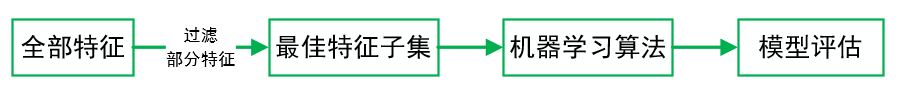

## 方差过滤

+ Variance Threshold是通过特征本身方差来筛选特征的类。比如一个特征本身的方差很小，就表示样本在这个特征上基本没有差异，可能特征中的大多数值都一样，甚至整个特征的取值都相同，那这个特征对于样本区分没有什么作用。所以无论接下来的特征工程要做什么，都要优先消除方差为0的特征。VarianceThreshold有重要参数threshold，表示方差的阈值，表示舍弃所有方差小于threshold的特征，不填默认为0，即删除所有的记录都相同的特征。

In [3]:
# 实例化，方差默认为0
var_selector = VarianceThreshold()

# 获取删除不合格特征后的新特征矩阵
var_filtered = var_selector.fit_transform(X_train)

In [4]:
var_filtered.shape

(42, 1841)

In [5]:
# 获取保留特征的布尔数组
# var_selector.get_support可以指示那些特征被保留了
features = var_selector.get_support(indices=True)

# 使用保留的特征列名和原始行索引创建新的DataFrame
var_filtered_df = pd.DataFrame(var_filtered, columns=X_train.columns[features], index=X_train.index)

var_filtered_df

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,gradient_glszm_LargeAreaHighGrayLevelEmphasis,gradient_glszm_LargeAreaLowGrayLevelEmphasis,gradient_glszm_SizeZoneNonUniformity,gradient_glszm_SizeZoneNonUniformityNormalized,gradient_glszm_SmallAreaEmphasis,gradient_glszm_SmallAreaHighGrayLevelEmphasis,gradient_glszm_SmallAreaLowGrayLevelEmphasis,gradient_glszm_ZoneEntropy,gradient_glszm_ZonePercentage,gradient_glszm_ZoneVariance
ID,,,,,,,,,,,,,,,,,,,,,
TCIA01_378_1,0.508598,0.258641,-0.571105,-0.793121,-0.291010,-0.780445,-0.424231,-0.670807,-0.644028,-0.508900,...,-0.533137,-0.533137,-0.160930,-1.380801,0.372921,0.372921,0.372921,1.511899,-0.189261,-0.264630
TCIA09_255_1,-1.247281,-0.884638,0.899611,2.192816,0.780483,2.131260,2.201986,1.928409,2.169205,0.884257,...,2.791613,2.791613,-0.414180,1.149294,-0.964252,-0.964252,-0.964252,-1.045526,-0.338441,-0.322206
TCIA10_307_1,-0.482540,0.096755,0.282163,0.274428,0.109043,0.365437,0.511395,0.189285,0.044544,-0.000348,...,-0.166149,-0.166149,-0.414180,1.149294,-0.964250,-0.964250,-0.964250,-1.045526,-0.333370,-0.322206
TCIA02_168_1,-0.105195,0.725885,0.277516,-0.147010,-0.003006,-0.113775,-0.041665,-0.240623,-0.373526,-0.162818,...,-0.521325,-0.521325,0.139805,-1.195621,0.295504,0.295504,0.295504,1.134121,-0.244456,-0.149741
TCIA01_412_1,-0.495348,0.612859,0.276745,-0.081357,0.476728,0.469847,-0.030173,0.292305,-0.280211,-0.299036,...,-0.513630,-0.513630,-0.034304,-1.247638,0.627972,0.627972,0.627972,1.388552,-0.266052,-0.081860
TCIA01_221_1,1.857356,1.521181,0.478031,-0.365838,0.406718,-0.240308,-0.084264,-0.329980,0.210295,0.521879,...,-0.041636,-0.041636,-0.414180,1.149294,-0.964251,-0.964251,-0.964251,-1.045526,-0.334392,-0.322206
TCIA01_150_1,-0.823062,-0.931907,-1.430530,-1.314896,-1.585209,-1.242272,-0.864648,-0.793149,-0.964351,-1.401010,...,-0.539186,-0.539186,0.117646,-0.677701,1.348005,1.348005,1.348005,0.522551,0.536884,-0.321211
TCIA01_499_1,-1.085164,-1.066074,-1.001325,-0.553997,-0.884694,-0.795416,-0.428771,-0.683567,-0.730244,-0.930705,...,-0.530864,-0.530864,-0.414180,-1.025700,0.517822,0.517822,0.517822,0.767335,-0.253931,-0.260725
TCIA10_346_1,1.326750,1.209841,1.143534,0.389012,0.784689,0.410631,0.703367,0.469419,1.472217,1.147843,...,1.481416,1.481416,-0.414180,1.149294,-0.964252,-0.964252,-0.964252,-1.045526,-0.337717,-0.322206


**随机森林**

In [6]:
# 实例化随机森林模型
rfc_model = RFC(n_estimators=5, random_state=0)

# 计算交叉验证得分
rfc_scores = cross_val_score(rfc_model, var_filtered_df, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"Random Forest score: {rfc_scores.mean()}")

Random Forest score: 0.7583333333333333


**支持向量机**

In [7]:
# 实例化SVM模型
svm_model = SVC(random_state=0)

# 计算交叉验证得分
svm_scores = cross_val_score(svm_model, var_filtered_df, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"SVM score: {svm_scores.mean()}")

SVM score: 0.8083333333333332


**逻辑回归**

In [8]:
# 实例化逻辑回归模型
logreg_model = LogisticRegression(max_iter=1000, random_state=0)

# 计算交叉验证得分
logreg_scores = cross_val_score(logreg_model, var_filtered_df, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"Logistic Regression score: {logreg_scores.mean()}")

Logistic Regression score: 0.7055555555555555


**梯度提升机**

In [9]:
# 实例化GBM模型
gbm_model = GBC(n_estimators=5, random_state=0)

# 计算交叉验证得分
gbm_scores = cross_val_score(gbm_model, var_filtered_df, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"GBM average score: {gbm_scores.mean()}")

GBM average score: 0.8055555555555556


## 单因素方差分析（One-Way ANOVA）

* F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。它即可以做回归也可以做分类，因此包含feature_selection.f_classif（F检验分类）和feature_selection.f_regression（F检验回归）两个类。其中F检验分类用于标签是离散型变量的数据，而F检验回归用于标签是连续型变量的数据。


* 可以与SelectKBest连用，或直接通过输出的统计量来判断K值。需要注意的是，F检验在数据服从正态分布时效果会非常稳定，因此如果使用F检验过滤，我们会先将数据转换成服从正态分布的方式。


* F检验的本质是寻找两组数据之间的线性关系，其原假设是”数据不存在显著的线性关系“。它返回F值和p值两个统计量。对于p值小于 0.05 的特征，我们认为在两组中（标签）特征的差异具有统计学意义特征，换句话说，这些特征是与标签有相关性的。对于p值大于 0.05 特征我们认为在两组中（标签）特征的差异不具有统计学意义，即不具备判别的能力。应该给予排除。

+ One-Way ANOVA（单因素方差分析）是一种统计方法，用于测试两个或更多独立样本组的平均数是否存在显著差异。它主要用于比较三个或更多组间的数据，以确定至少有一组的平均值是否与其他组不同。"One-Way"或"单因素"意味着分析涉及一个独立变量（因素）的不同水平。

+ 应用条件：两组（或多组）独立、正态、定量、方差齐数据

+ 两组时单因素方差分析相当于两样本t检验

In [10]:
# 计算统计量F值与P值
f_values, p_values = f_classif(var_filtered_df, y_train.values.flatten())

In [11]:
# 原数据的特征量 - 需要被删除的特征量
k = f_values.shape[0] - (p_values > 0.05).sum()

In [12]:
k

815

In [13]:
X_F_value_selected = SelectKBest(f_classif, k=815).fit_transform(var_filtered_df, y_train.values.flatten())

**随机森林**

In [14]:
# 实例化随机森林模型
rfc_model = RFC(n_estimators=5, random_state=0)

# 计算交叉验证得分
rfc_scores = cross_val_score(rfc_model, X_F_value_selected, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"Random Forest score: {rfc_scores.mean()}")

Random Forest score: 0.8027777777777778


**支持向量机**

In [15]:
# 实例化SVM模型
svm_model = SVC(random_state=0)

# 计算交叉验证得分
svm_scores = cross_val_score(svm_model, X_F_value_selected, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"SVM average score: {svm_scores.mean()}")

SVM average score: 0.7805555555555556


**逻辑回归**

In [16]:
# 实例化逻辑回归模型
logreg_model = LogisticRegression(max_iter=10000, random_state=0)

# 计算交叉验证得分
logreg_scores = cross_val_score(logreg_model, X_F_value_selected, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"Logistic Regression score: {logreg_scores.mean()}")

Logistic Regression score: 0.8277777777777778


**梯度提升机**

In [17]:
# 实例化GBM模型
gbm_model = GBC(n_estimators=5,random_state=0)

# 计算交叉验证得分
gbm_scores = cross_val_score(gbm_model, X_F_value_selected, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"GBM average score: {gbm_scores.mean()}")

GBM average score: 0.8305555555555555


## 互信息：最小冗余最大相关（mRMR）

In [18]:
# 合并数据集
df = pd.concat([y_train, var_filtered_df],axis=1)
df

,label,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,gradient_glszm_LargeAreaHighGrayLevelEmphasis,gradient_glszm_LargeAreaLowGrayLevelEmphasis,gradient_glszm_SizeZoneNonUniformity,gradient_glszm_SizeZoneNonUniformityNormalized,gradient_glszm_SmallAreaEmphasis,gradient_glszm_SmallAreaHighGrayLevelEmphasis,gradient_glszm_SmallAreaLowGrayLevelEmphasis,gradient_glszm_ZoneEntropy,gradient_glszm_ZonePercentage,gradient_glszm_ZoneVariance
ID,,,,,,,,,,,,,,,,,,,,,
TCIA01_378_1,1,0.508598,0.258641,-0.571105,-0.793121,-0.291010,-0.780445,-0.424231,-0.670807,-0.644028,...,-0.533137,-0.533137,-0.160930,-1.380801,0.372921,0.372921,0.372921,1.511899,-0.189261,-0.264630
TCIA09_255_1,0,-1.247281,-0.884638,0.899611,2.192816,0.780483,2.131260,2.201986,1.928409,2.169205,...,2.791613,2.791613,-0.414180,1.149294,-0.964252,-0.964252,-0.964252,-1.045526,-0.338441,-0.322206
TCIA10_307_1,0,-0.482540,0.096755,0.282163,0.274428,0.109043,0.365437,0.511395,0.189285,0.044544,...,-0.166149,-0.166149,-0.414180,1.149294,-0.964250,-0.964250,-0.964250,-1.045526,-0.333370,-0.322206
TCIA02_168_1,1,-0.105195,0.725885,0.277516,-0.147010,-0.003006,-0.113775,-0.041665,-0.240623,-0.373526,...,-0.521325,-0.521325,0.139805,-1.195621,0.295504,0.295504,0.295504,1.134121,-0.244456,-0.149741
TCIA01_412_1,1,-0.495348,0.612859,0.276745,-0.081357,0.476728,0.469847,-0.030173,0.292305,-0.280211,...,-0.513630,-0.513630,-0.034304,-1.247638,0.627972,0.627972,0.627972,1.388552,-0.266052,-0.081860
TCIA01_221_1,1,1.857356,1.521181,0.478031,-0.365838,0.406718,-0.240308,-0.084264,-0.329980,0.210295,...,-0.041636,-0.041636,-0.414180,1.149294,-0.964251,-0.964251,-0.964251,-1.045526,-0.334392,-0.322206
TCIA01_150_1,1,-0.823062,-0.931907,-1.430530,-1.314896,-1.585209,-1.242272,-0.864648,-0.793149,-0.964351,...,-0.539186,-0.539186,0.117646,-0.677701,1.348005,1.348005,1.348005,0.522551,0.536884,-0.321211
TCIA01_499_1,1,-1.085164,-1.066074,-1.001325,-0.553997,-0.884694,-0.795416,-0.428771,-0.683567,-0.730244,...,-0.530864,-0.530864,-0.414180,-1.025700,0.517822,0.517822,0.517822,0.767335,-0.253931,-0.260725
TCIA10_346_1,0,1.326750,1.209841,1.143534,0.389012,0.784689,0.410631,0.703367,0.469419,1.472217,...,1.481416,1.481416,-0.414180,1.149294,-0.964252,-0.964252,-0.964252,-1.045526,-0.337717,-0.322206


In [19]:
selected_mrmr = pymrmr.mRMR(df, 'MIQ',20) # MID？

In [20]:
selected_mrmr

['lbp-3D-m1_firstorder_Variance',
 'wavelet-LHH_glszm_SmallAreaEmphasis',
 'squareroot_firstorder_Skewness',
 'lbp-3D-m2_glszm_SmallAreaLowGrayLevelEmphasis',
 'original_glrlm_ShortRunHighGrayLevelEmphasis',
 'lbp-3D-m2_firstorder_10Percentile',
 'log-sigma-5-0-mm-3D_ngtdm_Strength',
 'wavelet-LHL_firstorder_Skewness',
 'log-sigma-3-0-mm-3D_gldm_DependenceNonUniformity',
 'lbp-3D-m2_glrlm_LongRunLowGrayLevelEmphasis',
 'wavelet-HLL_glszm_SmallAreaLowGrayLevelEmphasis',
 'lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis',
 'log-sigma-3-0-mm-3D_glcm_SumSquares',
 'wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis',
 'lbp-3D-m1_ngtdm_Contrast',
 'lbp-3D-m2_glrlm_LongRunHighGrayLevelEmphasis',
 'wavelet-LLH_ngtdm_Busyness',
 'wavelet-HLL_glcm_ClusterShade',
 'lbp-3D-m2_firstorder_Mean',
 'wavelet-LLL_firstorder_90Percentile']

In [21]:
mRMR_features = var_filtered_df[selected_mrmr]

**随机森林**

In [22]:
# 实例化随机森林模型
rfc_model = RFC(n_estimators=5, random_state=0)

# 计算交叉验证得分
rfc_scores = cross_val_score(rfc_model, mRMR_features, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"Random Forest score: {rfc_scores.mean()}")

Random Forest score: 0.9055555555555556


* 根据mRMR选取特征数绘制学习曲线

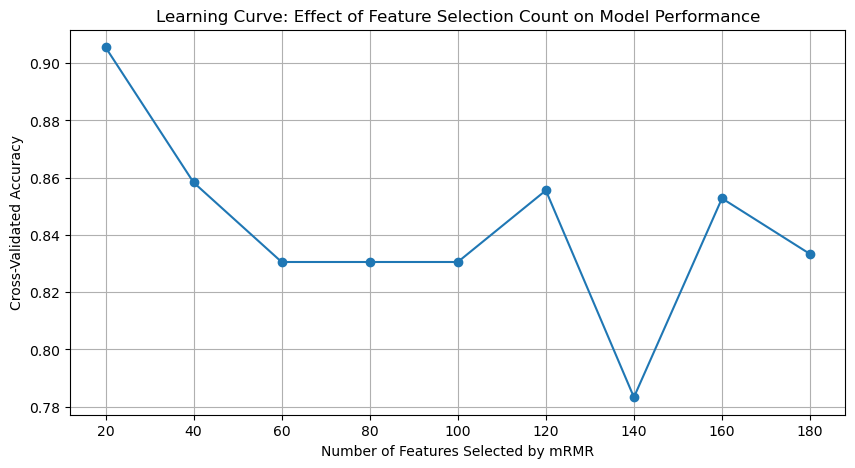

In [158]:
# 准备一个范围，例如每次增加20个特征
feature_counts = range(20, 200, 20)  # 根据需要调整
scores = []

for n_features in feature_counts:
    # 使用mRMR选择特征
    selected_features = pymrmr.mRMR(df, 'MIQ', n_features)
    mRMR_features = var_filtered_df[selected_features]
    
    # 评估模型
    score = cross_val_score(RFC(n_estimators=5, random_state=0), mRMR_features, y_train.values.flatten(), cv=5).mean()
    scores.append(score)

# 绘制学习曲线
plt.figure(figsize=[10,5])
plt.plot(feature_counts, scores, marker='o')
plt.xlabel('Number of Features Selected by mRMR')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Learning Curve: Effect of Feature Selection Count on Model Performance')
plt.grid(True)
plt.show()

**支持向量机**

In [23]:
# 实例化SVM模型
svm_model = SVC(random_state=0)

# 计算交叉验证得分
svm_scores = cross_val_score(svm_model, mRMR_features, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"SVM average score: {svm_scores.mean()}")

SVM average score: 0.9527777777777778


**逻辑回归**

In [24]:
# 实例化逻辑回归模型
logreg_model = LogisticRegression(max_iter=1000, random_state=0)

# 计算交叉验证得分
logreg_scores = cross_val_score(logreg_model,  mRMR_features, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"Logistic Regression score: {logreg_scores.mean()}")

Logistic Regression score: 0.9027777777777779


**梯度提升机**

In [25]:
# 实例化GBM模型
gbm_model = GBC(n_estimators=5
                ,random_state=0
               )

# 计算交叉验证得分
gbm_scores = cross_val_score(gbm_model,  mRMR_features, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"GBM score: {gbm_scores.mean()}")

GBM score: 0.8083333333333332


* 根据树的数量绘制学习曲线

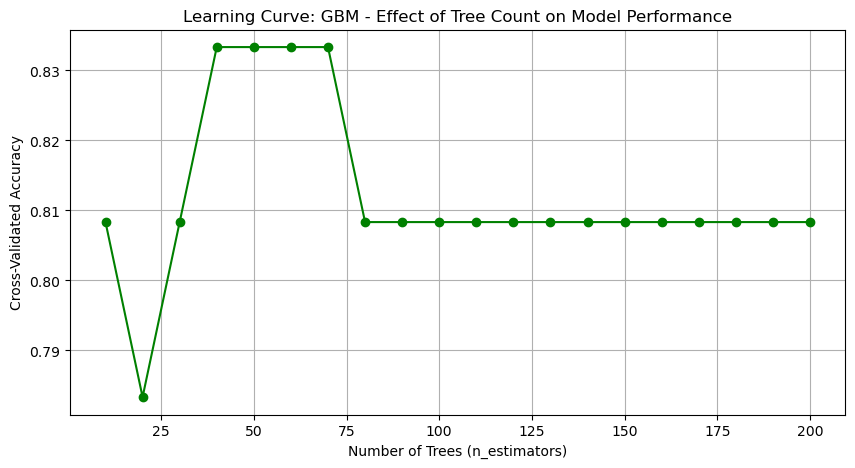

In [26]:
# 定义不同的n_estimators值
n_estimators_range = np.arange(10, 210, 10)
scores = []

# 循环不同的n_estimators值
for n_estimators in n_estimators_range:
    # 实例化GBM模型
    gbm_model = GBC(n_estimators=n_estimators, random_state=0)
    
    # 计算当前n_estimators下的交叉验证得分
    score = cross_val_score(gbm_model, mRMR_features, y_train.values.flatten(), cv=5).mean()
    scores.append(score)

# 绘制学习曲线
plt.figure(figsize=[10, 5])
plt.plot(n_estimators_range, scores, marker='o',color='g')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Learning Curve: GBM - Effect of Tree Count on Model Performance')
plt.grid(True)
plt.show()

# 包装法

+ 包装法是一个特征选择和算法训练同时进行的方法，它依赖于算法自身的选择，比如coef_属性或feature_importances_属性来完成特征选择。包装法往往使用一个目标函数作为黑盒来选取特征。包装法在初始特征集上训练评估器，并且通过coef_属性或通过feature_importances_属性获得每个特征的重要性。然后，从当前的一组特征中修剪最不重要的特征。在修剪的集合上递归地重复该过程，直到最终到达所需数量的要选择的特征。与过滤法不同，包装法使用特征子集进行多次训练，因此其所需要的计算成本较高。

* 关于权值系数概念与包装法的固有缺点见嵌入法中的说明。

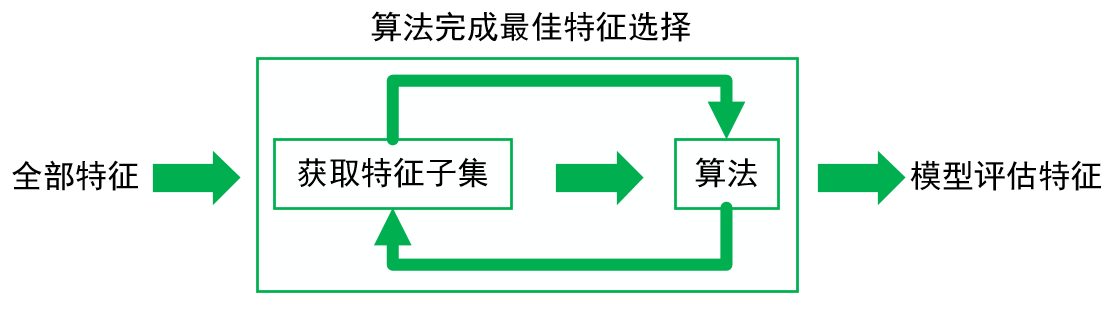

* 图中的算法并不是我们最终涌过来导入数据的分类和回归算法（即不是随机森林），而是专业的数据挖掘算法，即我们的目标函数。这些数据挖掘算法的核心功能就是选取最佳特征子集。

**递归特征消除（RFE）**

* 最典型的目标函数是递归特征消除法（Recursive feature elimination,简写为RFE）。它是一种贪婪的优化算法，旨在找到性能最佳的特征子集。 它反复创建模型，并在每次迭代时保留最佳特征或剔除最差特征，下一次迭代时，它会使用上一次建模中没有被选中的特征来构建下一个模型，直到所有特征都耗尽为止。 然后，它根据自己保留或剔除特征的顺序来对特征进行排名，最终选出一个最佳子集。包装法的效果是所有特征选择方法中最利于提升模型表现的，它可以使用很少的特征达到很优秀的效果。除此之外，在特征数目相同时，包装法和嵌入法的效果能够匹敌，不过它比嵌入法算得更见缓慢，所以也不适用于太大型的数据。相比之下，包装法是最能保证模型效果的特征选择方法。

**核心函数**
* sklearn.feature_selection.RFE()
* sklearn.feature_selection.RFECV()

**重要参数、属性与方法**
* n_features_to_select 想要选择的特征个数
* estimator 使用模型的评估器，只要是带feature_importances_或coef_属性都可以使用
* .support_返回所有的特征是否被选中的布尔矩阵
* .ranking_返回特征的按数次迭代中综合重要性排名

## 随机森林

### 随机森林特征选择

In [27]:
# 模型实例化
RFC_ = RFC(n_estimators=10,max_depth=2,random_state=0)

In [28]:
# RFE实例化并拟合模型
selector = RFE(estimator=RFC_, n_features_to_select=8, step=5)
selector.fit(mRMR_features, y_train.values.flatten())

RFE(estimator=RandomForestClassifier(max_depth=2, n_estimators=10,
                                     random_state=0),
    n_features_to_select=8, step=5)

In [29]:
# 检查特征选择的数量
selector.support_.sum()

8

In [30]:
# 选择的特征
selected_features_mask = selector.support_
selected_features = mRMR_features.columns[selected_features_mask]
selected_features

Index(['lbp-3D-m1_firstorder_Variance', 'wavelet-LHH_glszm_SmallAreaEmphasis',
       'wavelet-LHL_firstorder_Skewness',
       'lbp-3D-m2_glrlm_LongRunLowGrayLevelEmphasis',
       'lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis', 'lbp-3D-m1_ngtdm_Contrast',
       'lbp-3D-m2_glrlm_LongRunHighGrayLevelEmphasis',
       'lbp-3D-m2_firstorder_Mean'],
      dtype='object')

In [31]:
# 查看所有特征排名
selector.ranking_

array([1, 1, 4, 4, 3, 4, 4, 1, 3, 1, 3, 1, 3, 2, 1, 1, 2, 3, 1, 4])

In [32]:
# 保留RFE选择后的特征集合
X_wrapper = selector.transform(mRMR_features) 
X_wrapper.shape

(42, 8)

In [33]:
# 使用RFE+交叉验证进行特征选择
rf_scores = cross_val_score(RFC_,X_wrapper,y_train.values.flatten(),cv=5)
# 打印平均得分
print(f"Random Forest score: {rf_scores.mean()}")

Random Forest score: 0.9027777777777779


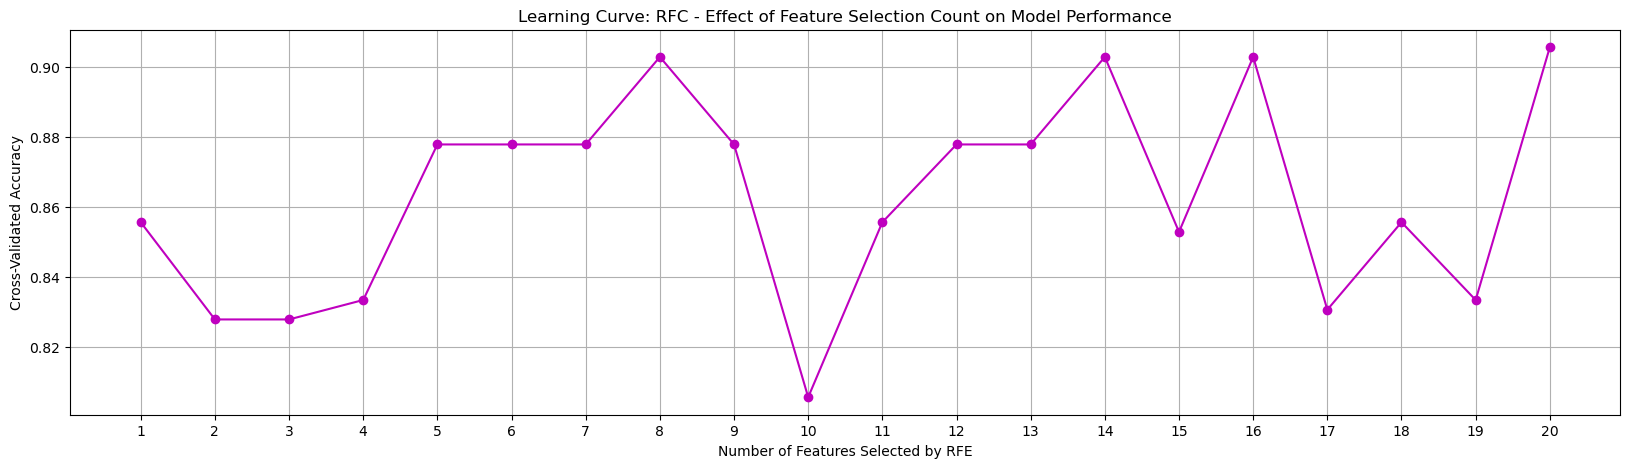

In [34]:
# 初始化列表来存储分数
scores = []

# 循环不同数量的特征
feature_range = range(1, 21)
for i in feature_range:
    # RFE选择特征
    selector = RFE(estimator=RFC_, n_features_to_select=i, step=5)
    X_wrapper = selector.fit_transform(mRMR_features, y_train.values.flatten())
    
    # 使用选中的特征重新训练RFC模型，并计算交叉验证得分
    score = cross_val_score(RFC_, X_wrapper, y_train.values.flatten(), cv=5).mean()
    scores.append(score)

# 绘制学习曲线
plt.figure(figsize=[20, 5])
plt.plot(range(1, 21), scores, marker='o', linestyle='-', color='m')
plt.xlabel('Number of Features Selected by RFE')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Learning Curve: RFC - Effect of Feature Selection Count on Model Performance')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


### 随机森林模型构建

In [35]:
# 模型实例化
RFC_ = RFC(n_estimators=10,max_depth=2,random_state=0)

In [36]:
# 训练集特征选择
# 使用RFE进行特征选择
selector = RFE(estimator=RFC_, n_features_to_select=8, step=5)

X_train_selected = selector.fit_transform(mRMR_features, y_train.values.flatten())
X_train_selected.shape

(42, 8)

In [37]:
# 测试集特征选择
X_test = X_test[mRMR_features.columns]

# 使用相同的selector转换测试集
X_test_selected = selector.transform(X_test)
X_test_selected.shape

(18, 8)

In [38]:
# 用选择的特征训练模型
RF_Model = RFC_.fit(X_train_selected, y_train.values.flatten())

### 随机森林模型评价

In [39]:
y_train_pred = RFC_.predict(X_train_selected)
y_test_pred = RFC_.predict(X_test_selected)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Train Accuracy: 0.9523809523809523
Test Accuracy: 0.6666666666666666


In [40]:
# 计算性能度量指标
metrics = {
    "Accuracy": (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)),
    "Precision": (precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)),
    "Recall": (recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)),
    "F1 Score": (f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)),
    "ROC AUC": (roc_auc_score(y_train, y_train_pred), roc_auc_score(y_test, y_test_pred))
}

# 展示性能度量表格
metrics_df = pd.DataFrame(metrics, index=["Train", "Test"])
print(metrics_df)

       Accuracy  Precision    Recall  F1 Score   ROC AUC
Train  0.952381   0.952381  0.952381  0.952381  0.952381
Test   0.666667   0.666667  0.666667  0.666667  0.666667


#### 混淆矩阵

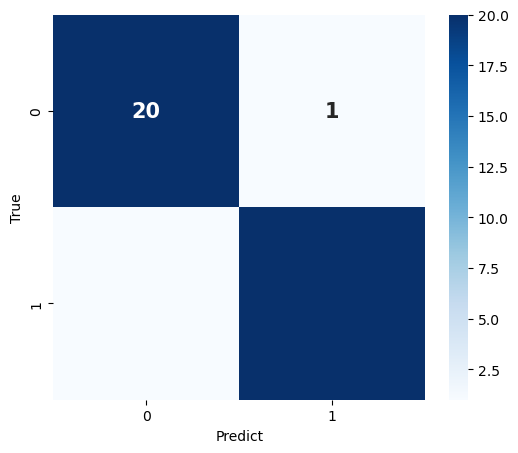

混淆矩阵为：
[[20  1]
 [ 1 20]]

计算各项指标：
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.95      0.95      0.95        21

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



In [41]:
#绘制混淆矩阵
predict_label = RF_Model.predict(X_train_selected) #预测的标签
label = y_train.values.flatten()  #真实标签
confusion = confusion_matrix(label, predict_label)#计算混淆矩阵

plt.figure(figsize=(6,5))
sns.heatmap(confusion,cmap='Blues',annot=True,annot_kws={'size':15,'weight':'bold', })#绘制混淆矩阵
plt.xlabel('Predict')
plt.ylabel('True')
plt.show()

print("混淆矩阵为：\n{}".format(confusion))
print("\n计算各项指标：")
print(classification_report(label, predict_label))

#### ROC曲线

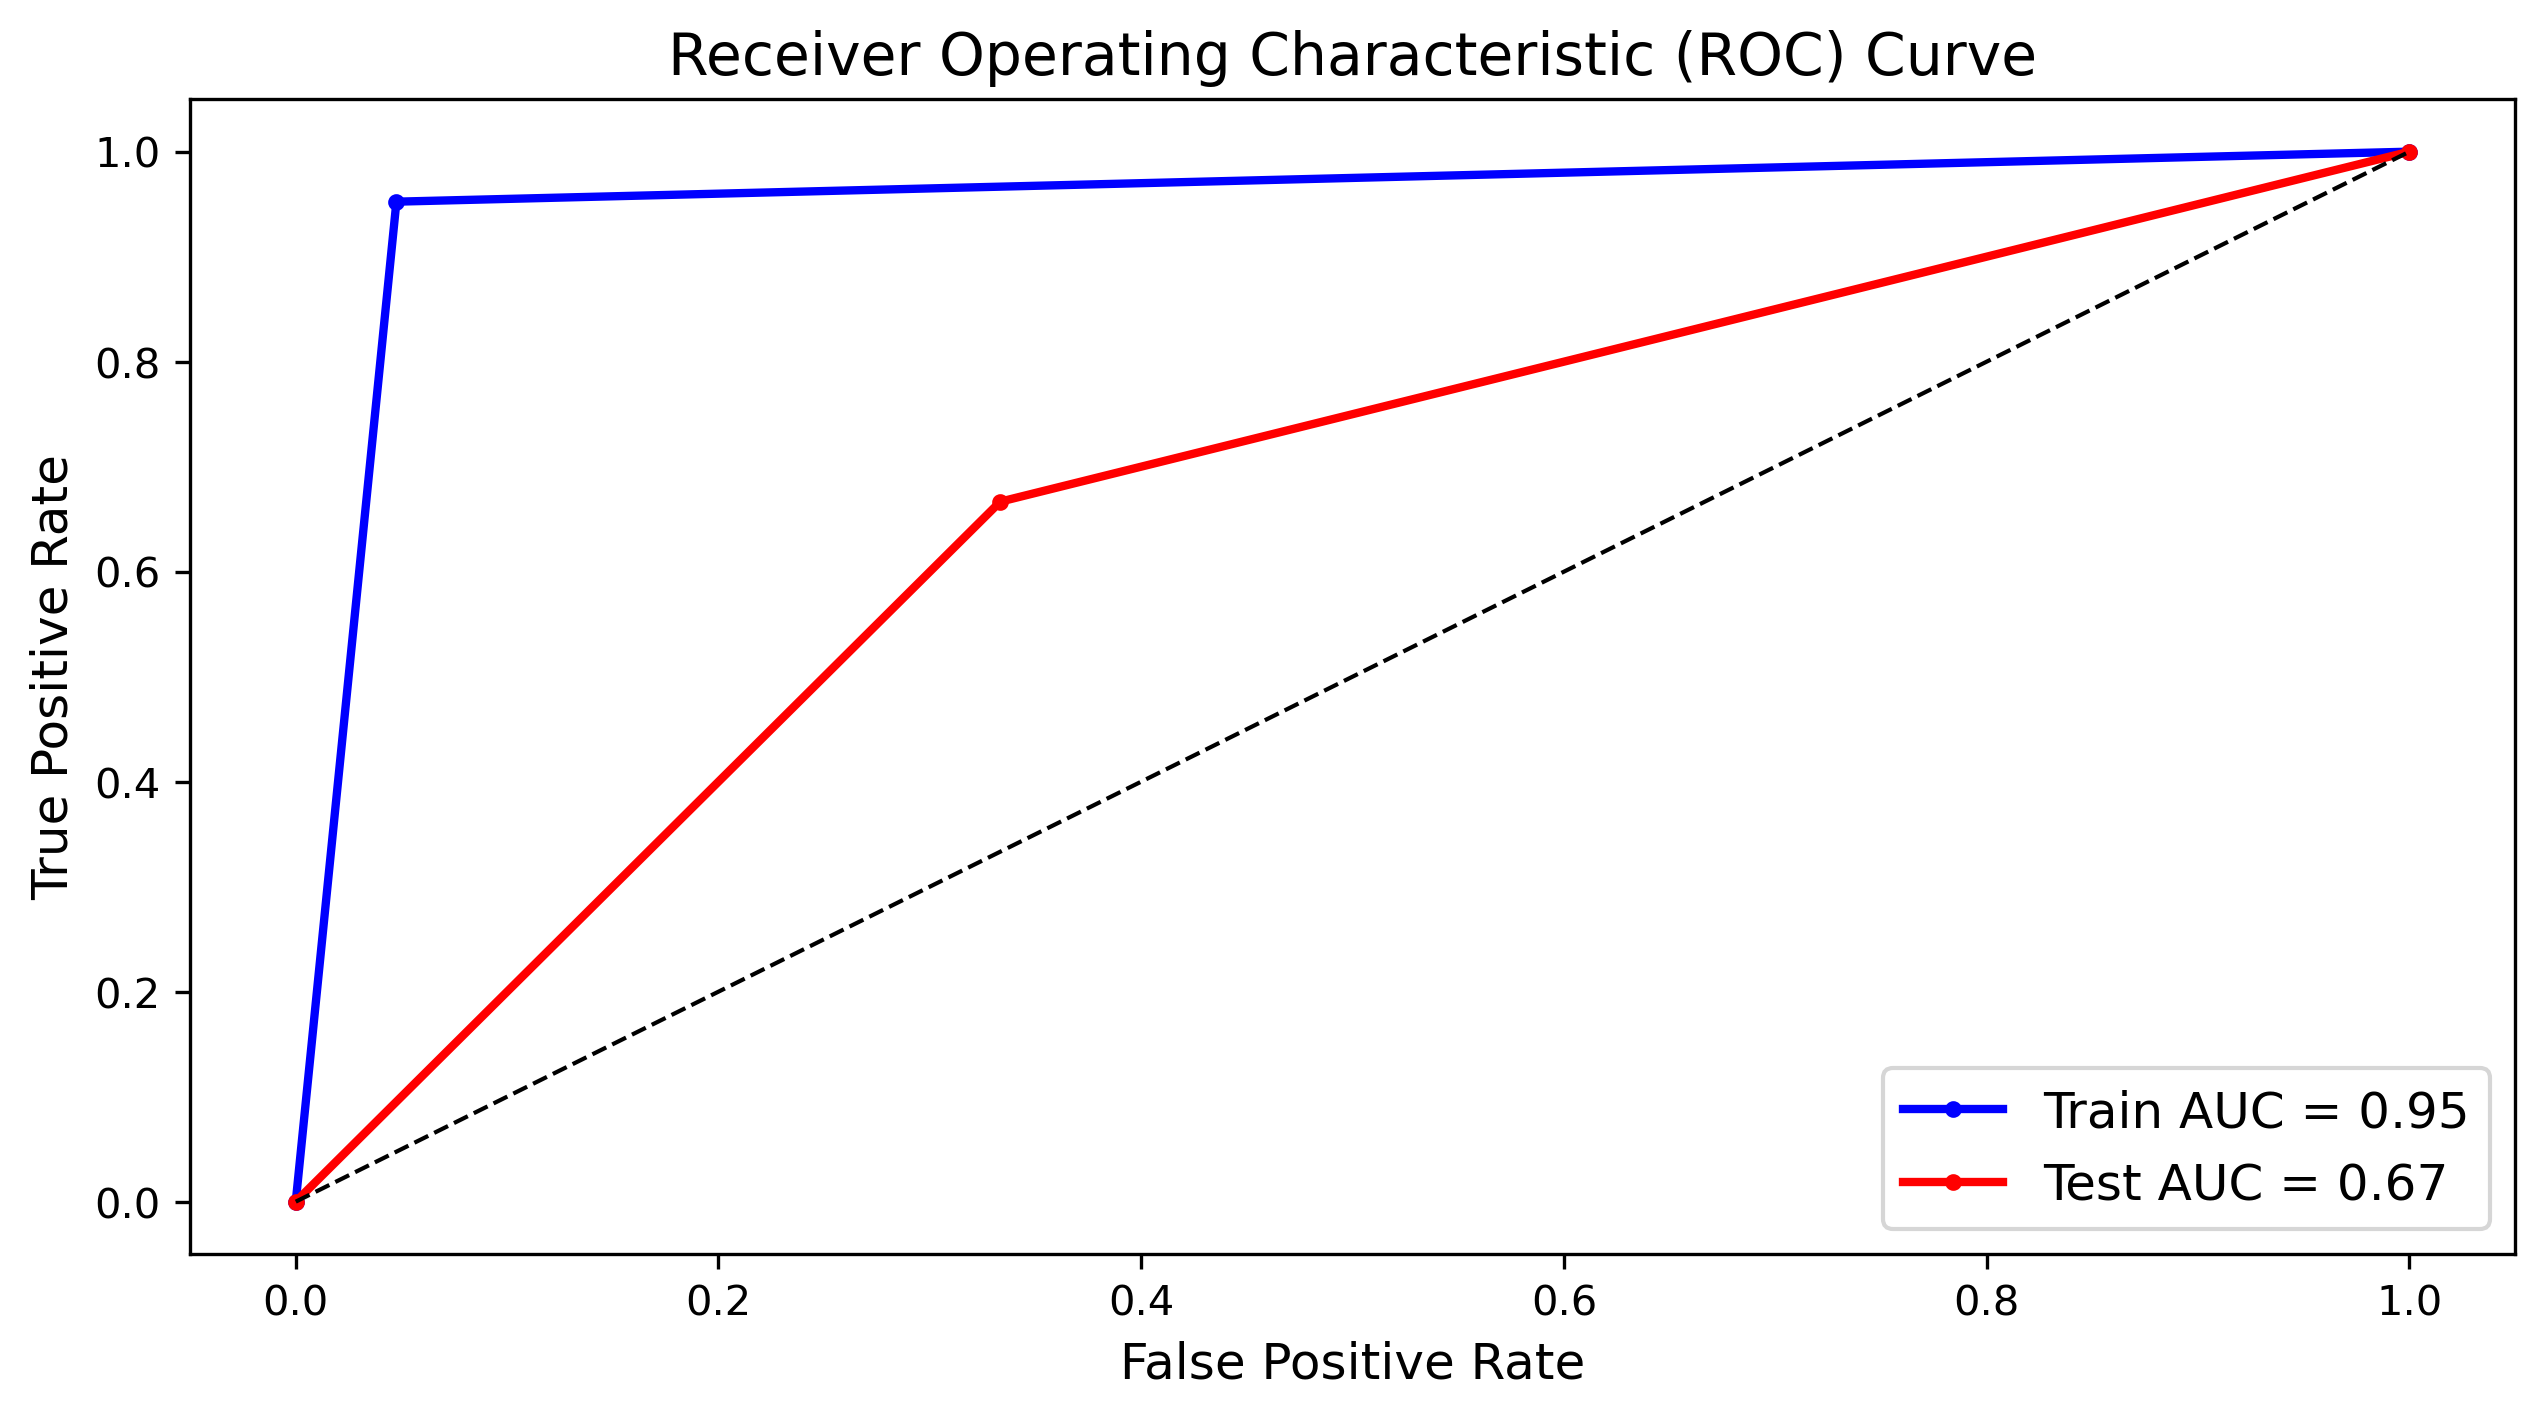

In [42]:
# 计算ROC曲线的FPR, TPR, 阈值
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

# 计算AUC值
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 5), dpi=300)
plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(auc_train), color='blue', linestyle='-', linewidth=2, marker='.')
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(auc_test), color='red', linestyle='-', linewidth=2, marker='.')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(False)
plt.gca().set_facecolor('white')
plt.show()

#### 校准曲线

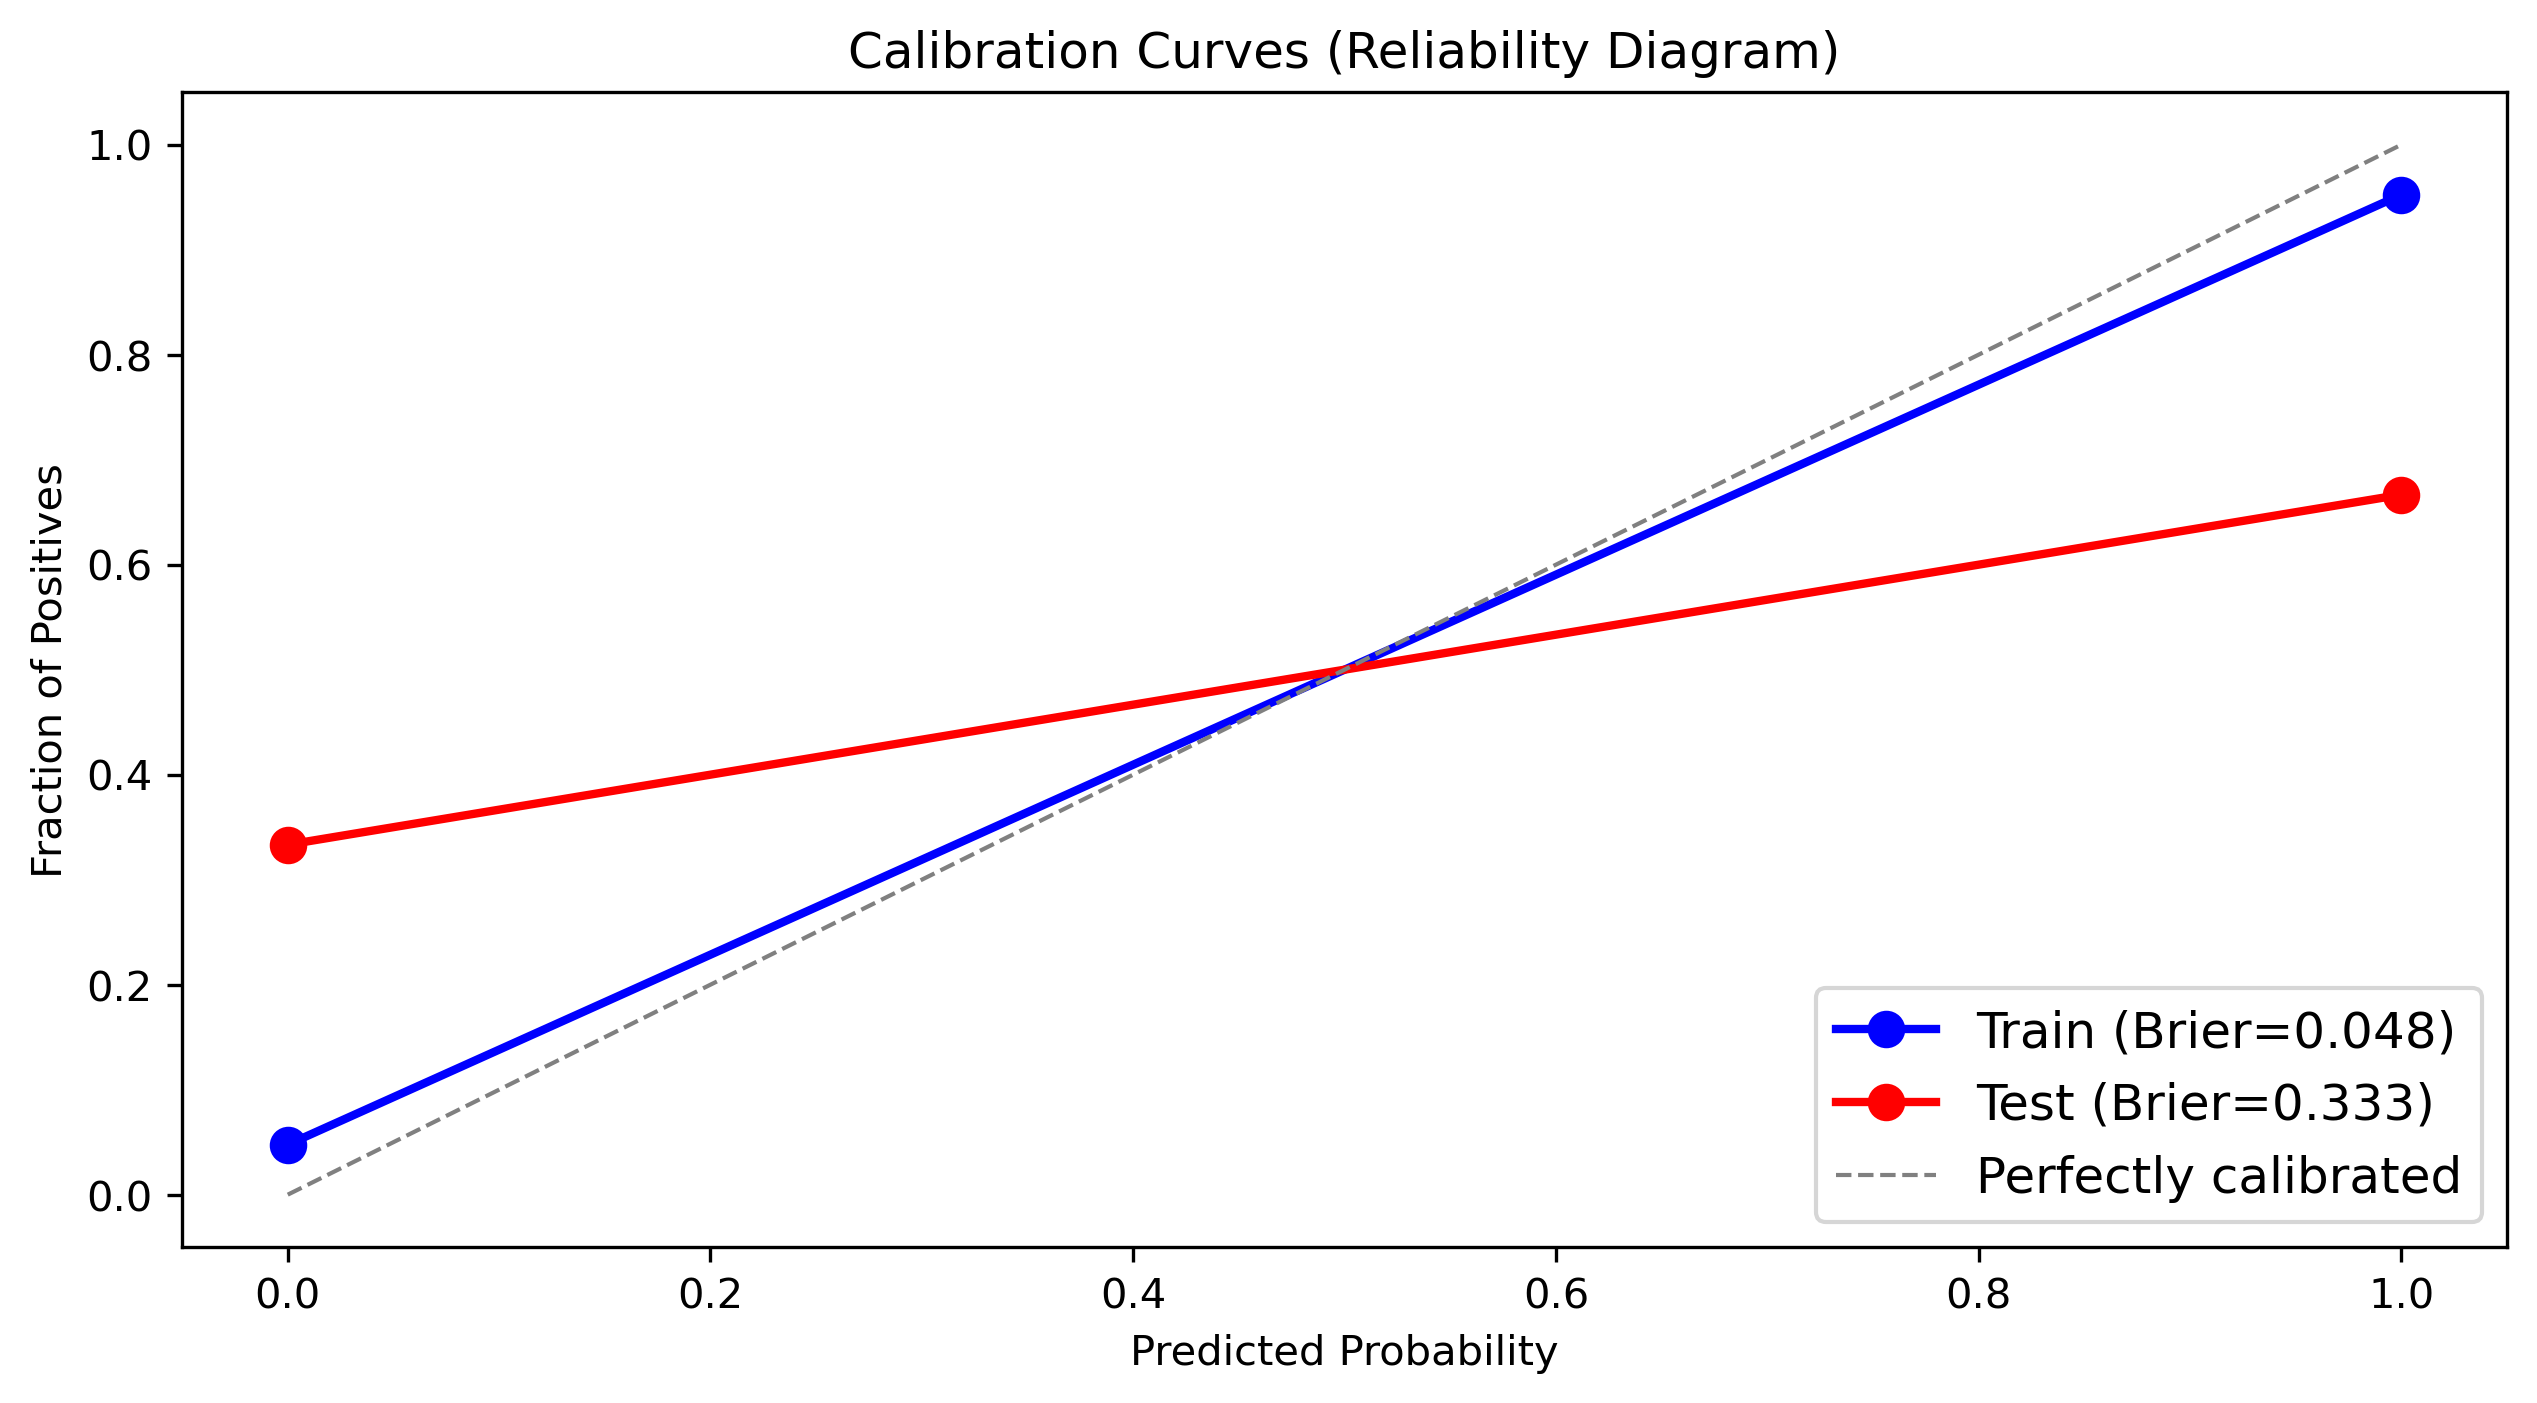

In [43]:
plt.style.use('default')

# 计算校准曲线
prob_true_train, prob_pred_train = calibration_curve(y_train, y_train_pred, n_bins=10)
prob_true_test, prob_pred_test = calibration_curve(y_test, y_test_pred, n_bins=10)

# 计算Brier分数
brier_score_train = brier_score_loss(y_train, y_train_pred)
brier_score_test = brier_score_loss(y_test, y_test_pred)

# 绘制校准曲线
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(prob_pred_train, prob_true_train, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8, label='Train (Brier={:.3f})'.format(brier_score_train))
plt.plot(prob_pred_test, prob_true_test, marker='o', linestyle='-', color='red', linewidth=2, markersize=8, label='Test (Brier={:.3f})'.format(brier_score_test))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=1, label='Perfectly calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves (Reliability Diagram)')
plt.legend(loc='lower right', fontsize=12)
plt.gca().set_facecolor('white')
plt.grid(False)
plt.show()

#### 临床决策曲线

In [44]:
# https://blog.csdn.net/qq_48321729/article/details/123241746

def calculate_net_benefit_model(thresh_group, y_pred_score, y_label):
    net_benefit_model = np.array([])
    for thresh in thresh_group:
        y_pred_label = y_pred_score > thresh
        tn, fp, fn, tp = confusion_matrix(y_label, y_pred_label).ravel()
        n = len(y_label)
        net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_benefit_model = np.append(net_benefit_model, net_benefit)
    return net_benefit_model


def calculate_net_benefit_all(thresh_group, y_label):
    net_benefit_all = np.array([])
    tn, fp, fn, tp = confusion_matrix(y_label, y_label).ravel()
    total = tp + tn
    for thresh in thresh_group:
        net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
        net_benefit_all = np.append(net_benefit_all, net_benefit)
    return net_benefit_all


def plot_DCA(ax, thresh_group, net_benefit_model, net_benefit_all):
    #Plot
    ax.plot(thresh_group, net_benefit_model, color = 'crimson', label = 'Model')
    ax.plot(thresh_group, net_benefit_all, color = 'black',label = 'Treat all')
    ax.plot((0, 1), (0, 0), color = 'black', linestyle = ':', label = 'Treat none')

    #Fill，显示出模型较于treat all和treat none好的部分
    y2 = np.maximum(net_benefit_all, 0)
    y1 = np.maximum(net_benefit_model, y2)
    ax.fill_between(thresh_group, y1, y2, color = 'crimson', alpha = 0.2)

    #Figure Configuration， 美化一下细节
    ax.set_xlim(0,1)
    ax.set_ylim(-0.05, net_benefit_model.max() + 0.05)
#     ax.set_ylim(net_benefit_model.min() - 0.15, net_benefit_model.max() + 0.15)#adjustify the y axis limitation
    ax.set_xlabel(
        xlabel = 'Threshold Probability', 
        fontdict= {'family': 'Times New Roman', 'fontsize': 15}
        )
    ax.set_ylabel(
        ylabel = 'Net Benefit', 
        fontdict= {'family': 'Times New Roman', 'fontsize': 15}
        )
    ax.grid('major')
    ax.spines['right'].set_color((0.8, 0.8, 0.8))
    ax.spines['top'].set_color((0.8, 0.8, 0.8))
    ax.legend(loc = 'upper right')

    return ax

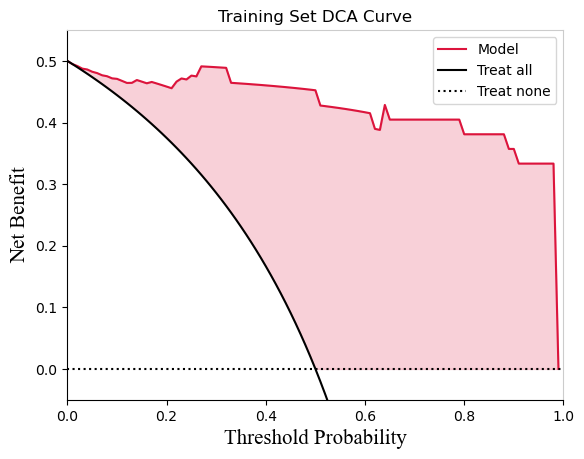

In [45]:
if __name__ == '__main__':
    # 使用模型对测试集进行概率预测
    y_pred_prob = RF_Model.predict_proba(X_train_selected)[:, 1]

    # 定义阈值组
    thresh_group = np.arange(0, 1, 0.01)
    
    # 计算决策曲线
    net_benefit_model = calculate_net_benefit_model(thresh_group, y_pred_prob, y_train.values.flatten())
    net_benefit_all = calculate_net_benefit_all(thresh_group, y_train.values.flatten())
    
    # 绘制决策曲线
    fig, ax = plt.subplots()
    plt.title('Training Set DCA Curve')
    plt.gca().set_facecolor('white')
    ax = plot_DCA(ax, thresh_group, net_benefit_model, net_benefit_all)
    plt.grid(False)
    plt.show()

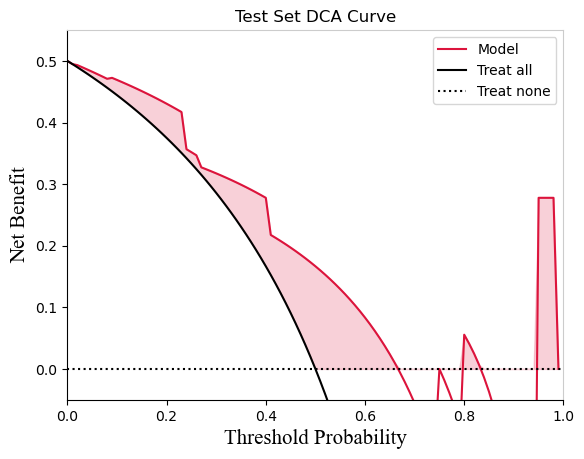

In [46]:
if __name__ == '__main__':
    # 使用模型对测试集进行概率预测
    y_pred_prob = RF_Model.predict_proba(X_test_selected)[:, 1]

    # 定义阈值组
    thresh_group = np.arange(0, 1, 0.01)
    
    # 计算决策曲线
    net_benefit_model = calculate_net_benefit_model(thresh_group, y_pred_prob, y_test.values.flatten())
    net_benefit_all = calculate_net_benefit_all(thresh_group, y_test.values.flatten())
    
    # 绘制决策曲线
    fig, ax = plt.subplots()
    plt.title('Test Set DCA Curve')
    plt.gca().set_facecolor('white')
    ax = plot_DCA(ax, thresh_group, net_benefit_model, net_benefit_all)
    plt.grid(False)
    plt.show()

## 支持向量机

In [47]:
# 实例化线性SVM模型
linear_svm_model = LinearSVC(random_state=0, max_iter=10000)

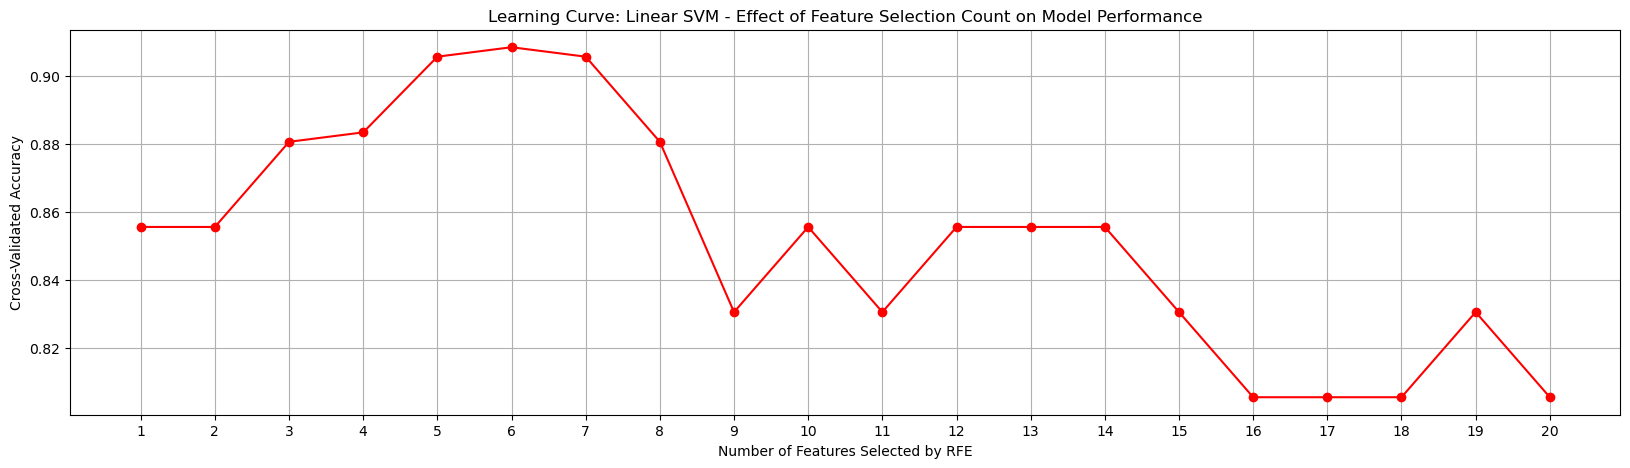

In [48]:
# 初始化列表来存储分数
scores_svm = []

# 循环不同数量的特征
for i in range(1, 21):
    # RFE选择特征
    selector = RFE(estimator=LinearSVC(random_state=0, max_iter=10000), n_features_to_select=i, step=1)
    X_wrapper = selector.fit_transform(mRMR_features, y_train.values.flatten())
    
    # 使用选中的特征重新训练SVM模型，并计算交叉验证得分
    score = cross_val_score(LinearSVC(random_state=0, max_iter=10000), X_wrapper, y_train.values.flatten(), cv=5).mean()
    scores_svm.append(score)

# 绘制学习曲线
plt.figure(figsize=[20, 5])
plt.plot(range(1, 21), scores_svm, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Features Selected by RFE')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Learning Curve: Linear SVM - Effect of Feature Selection Count on Model Performance')
plt.xticks(range(1, 21))
# plt.style.use('default')
plt.grid(True)
plt.show()

In [49]:
# RFE实例化并拟合模型，使用线性SVM作为基模型
selector_svm = RFE(estimator=linear_svm_model, n_features_to_select=6, step=1)
X_train_svm_selected = selector_svm.fit_transform(mRMR_features, y_train.values.flatten())
X_train_svm_selected.shape

(42, 6)

In [50]:
# 选择的特征
selected_features_mask = selector_svm.support_
selected_features = mRMR_features.columns[selected_features_mask]
selected_features

Index(['lbp-3D-m1_firstorder_Variance', 'wavelet-LHL_firstorder_Skewness',
       'log-sigma-3-0-mm-3D_gldm_DependenceNonUniformity',
       'lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis',
       'wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis',
       'lbp-3D-m2_glrlm_LongRunHighGrayLevelEmphasis'],
      dtype='object')

In [51]:
# # 测试集特征选择
# X_test = X_test[mRMR_features.columns]

# # 使用相同的selector转换测试集
# X_test_selected = selector.transform(X_test)
# X_test_selected.shape

In [52]:
# 使用相同的selector转换测试集
X_test_svm_selected = selector_svm.transform(X_test)
X_test_svm_selected.shape

(18, 6)

In [53]:
# 使用选中的特征重新训练SVM模型，并计算交叉验证得分
svm_scores = cross_val_score(linear_svm_model, X_train_svm_selected, y_train.values.flatten(), cv=5)
print(f"SVM score: {svm_scores.mean()}")

SVM score: 0.9083333333333332


In [54]:
# 用选择的特征训练模型
linear_svm_model.fit(X_train_svm_selected, y_train.values.flatten())

LinearSVC(max_iter=10000, random_state=0)

In [55]:
y_train_pred = linear_svm_model.predict(X_train_svm_selected)
y_test_pred = linear_svm_model.predict(X_test_svm_selected)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Train Accuracy: 0.9761904761904762
Test Accuracy: 0.7777777777777778


In [56]:
# 计算性能度量指标
metrics = {
    "Accuracy": (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)),
    "Precision": (precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)),
    "Recall": (recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)),
    "F1 Score": (f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)),
    "ROC AUC": (roc_auc_score(y_train, y_train_pred), roc_auc_score(y_test, y_test_pred))
}

# 展示性能度量表格
metrics_df = pd.DataFrame(metrics, index=["Train", "Test"])
print(metrics_df)

       Accuracy  Precision    Recall  F1 Score   ROC AUC
Train  0.976190   1.000000  0.952381   0.97561  0.976190
Test   0.777778   0.727273  0.888889   0.80000  0.777778


## 逻辑回归

In [57]:
# 实例化逻辑回归模型
logistic_model = LogisticRegression(random_state=0, max_iter=10000)

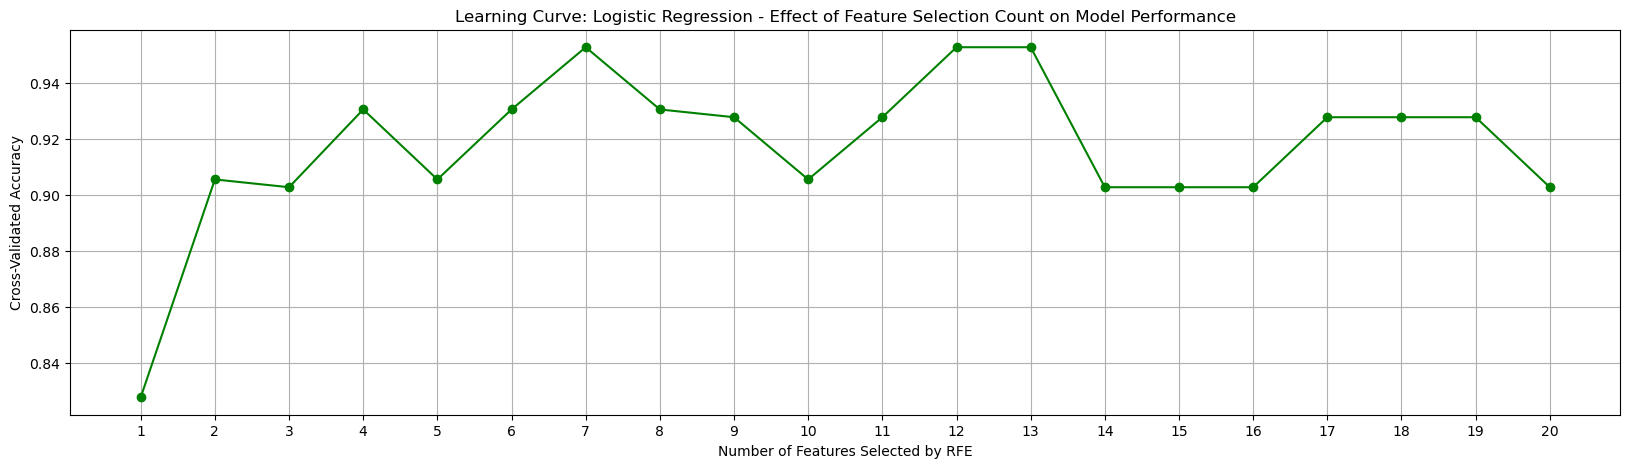

In [58]:
# 初始化列表来存储分数
scores_lr = []

# 循环不同数量的特征
for i in range(1, 21):
    # RFE选择特征
    selector = RFE(estimator=LogisticRegression(random_state=0, max_iter=10000), n_features_to_select=i, step=1)
    X_wrapper = selector.fit_transform(mRMR_features, y_train.values.flatten())
    
    # 使用选中的特征重新训练逻辑回归模型，并计算交叉验证得分
    score = cross_val_score(LogisticRegression(random_state=0, max_iter=10000), X_wrapper, y_train.values.flatten(), cv=5).mean()
    scores_lr.append(score)

# 绘制学习曲线
plt.figure(figsize=[20, 5])
plt.plot(range(1, 21), scores_lr, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Features Selected by RFE')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Learning Curve: Logistic Regression - Effect of Feature Selection Count on Model Performance')
plt.xticks(range(1, 21)) 
plt.grid(True)
plt.show()

In [59]:
# RFE实例化并拟合模型，使用逻辑回归作为基模型
selector_lr = RFE(estimator=logistic_model, n_features_to_select=7, step=1)
X_train_lr_selected = selector_lr.fit_transform(mRMR_features, y_train.values.flatten())
X_train_lr_selected.shape

(42, 7)

In [60]:
# 选择的特征
selected_features_mask = selector_lr.support_
selected_features = mRMR_features.columns[selected_features_mask]
selected_features

Index(['lbp-3D-m1_firstorder_Variance', 'wavelet-LHL_firstorder_Skewness',
       'log-sigma-3-0-mm-3D_gldm_DependenceNonUniformity',
       'lbp-3D-m2_glrlm_LongRunLowGrayLevelEmphasis',
       'wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis',
       'lbp-3D-m1_ngtdm_Contrast',
       'lbp-3D-m2_glrlm_LongRunHighGrayLevelEmphasis'],
      dtype='object')

In [61]:
# 使用相同的selector转换测试集
X_test_lr_selected = selector_lr.transform(X_test)
X_test_lr_selected.shape

(18, 7)

In [62]:
# 使用选中的特征重新训练逻辑回归模型，并计算交叉验证得分
logistic_scores = cross_val_score(logistic_model, X_train_lr_selected, y_train.values.flatten(), cv=5)
print(f"Logistic Regression score: {logistic_scores.mean()}")

Logistic Regression score: 0.9527777777777778


In [63]:
# 用选择的特征训练模型
logistic_model.fit(X_train_lr_selected, y_train.values.flatten())

LogisticRegression(max_iter=10000, random_state=0)

In [64]:
y_train_pred = logistic_model.predict(X_train_lr_selected)
y_test_pred = logistic_model.predict(X_test_lr_selected)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Train Accuracy: 0.9761904761904762
Test Accuracy: 0.7222222222222222


In [65]:
# 计算性能度量指标
metrics = {
    "Accuracy": (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)),
    "Precision": (precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)),
    "Recall": (recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)),
    "F1 Score": (f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)),
    "ROC AUC": (roc_auc_score(y_train, y_train_pred), roc_auc_score(y_test, y_test_pred))
}

# 展示性能度量表格
metrics_df = pd.DataFrame(metrics, index=["Train", "Test"])
print(metrics_df)

       Accuracy  Precision    Recall  F1 Score   ROC AUC
Train  0.976190        1.0  0.952381  0.975610  0.976190
Test   0.722222        0.7  0.777778  0.736842  0.722222


## 梯度提升机

In [66]:
# 实例化梯度提升机模型
gbm_model = GBC(learning_rate=0.01,n_estimators=30,subsample=0.8,max_depth=3,random_state=0)

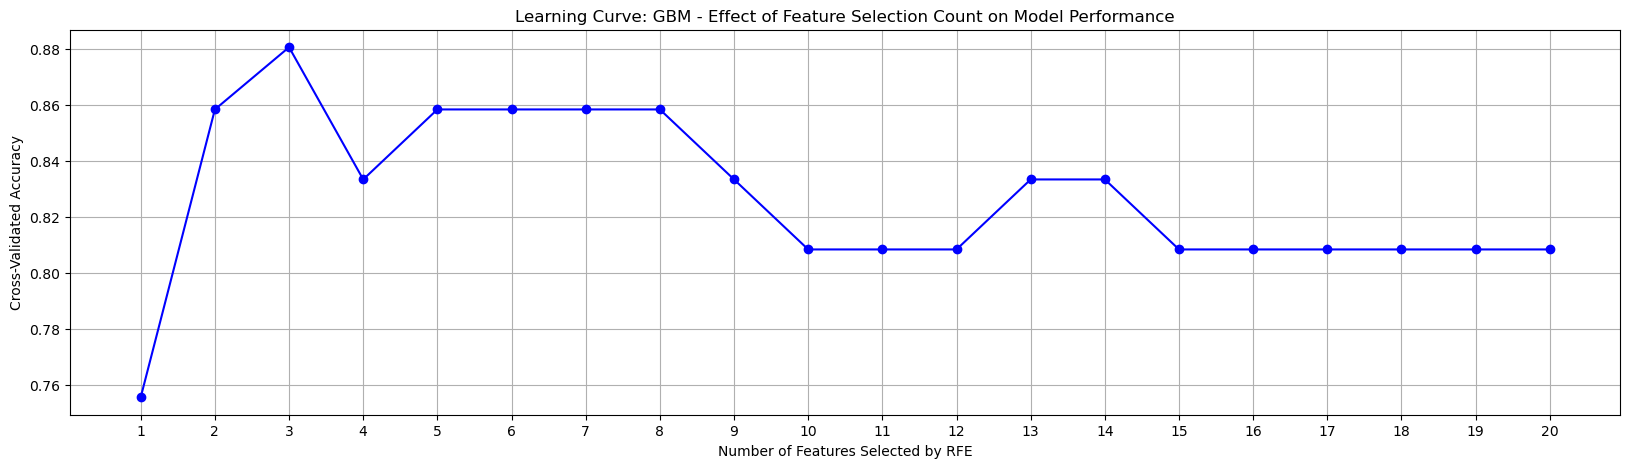

In [67]:
# 初始化列表来存储分数
scores_gbm = []

# 循环不同数量的特征
for i in range(1, 21): 
    # RFE选择特征
    selector = RFE(estimator=GBC(learning_rate=0.01,n_estimators=30,subsample=0.8,max_depth=3,random_state=0), n_features_to_select=i, step=1)
    X_wrapper = selector.fit_transform(mRMR_features, y_train.values.flatten())
    
    # 使用选中的特征重新训练GBM模型，并计算交叉验证得分
    score = cross_val_score(GBC(random_state=0), X_wrapper, y_train.values.flatten(), cv=5).mean()
    scores_gbm.append(score)

# 绘制学习曲线
plt.figure(figsize=[20, 5])
plt.plot(range(1, 21), scores_gbm, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Features Selected by RFE')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Learning Curve: GBM - Effect of Feature Selection Count on Model Performance')
plt.xticks(range(1, 21)) 
plt.grid(True)
plt.show()

In [68]:
# RFE实例化并拟合模型，使用梯度提升机作为基模型
selector_GBC = RFE(estimator=gbm_model, n_features_to_select=3, step=1)
X_train_GBC_selected = selector_GBC.fit_transform(mRMR_features, y_train.values.flatten())
X_train_GBC_selected.shape

(42, 3)

In [69]:
# 选择的特征
selected_features_mask = selector_GBC.support_
selected_features = mRMR_features.columns[selected_features_mask]
selected_features

Index(['wavelet-LHL_firstorder_Skewness',
       'lbp-3D-m2_glrlm_LongRunLowGrayLevelEmphasis',
       'lbp-3D-m1_ngtdm_Contrast'],
      dtype='object')

In [70]:
# 使用相同的selector转换测试集
X_test_GBC_selected = selector_GBC.transform(X_test)
X_test_GBC_selected.shape

(18, 3)

In [71]:
# 使用选中的特征重新训练GBM模型，并计算交叉验证得分
gbm_scores = cross_val_score(gbm_model, X_train_GBC_selected, y_train.values.flatten(), cv=5)
print(f"GBM score: {gbm_scores.mean()}")

GBM score: 0.8805555555555555


In [72]:
# 用选择的特征训练模型
gbm_model.fit(X_train_GBC_selected, y_train.values.flatten())

GradientBoostingClassifier(learning_rate=0.01, n_estimators=30, random_state=0,
                           subsample=0.8)

In [73]:
y_train_pred = gbm_model.predict(X_train_GBC_selected)
y_test_pred = gbm_model.predict(X_test_GBC_selected)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

Train Accuracy: 0.9761904761904762
Test Accuracy: 0.7222222222222222


In [74]:
# 计算性能度量指标
metrics = {
    "Accuracy": (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)),
    "Precision": (precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)),
    "Recall": (recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)),
    "F1 Score": (f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)),
    "ROC AUC": (roc_auc_score(y_train, y_train_pred), roc_auc_score(y_test, y_test_pred))
}

# 展示性能度量表格
metrics_df = pd.DataFrame(metrics, index=["Train", "Test"])
print(metrics_df)

       Accuracy  Precision    Recall  F1 Score   ROC AUC
Train  0.976190   0.954545  1.000000  0.976744  0.976190
Test   0.722222   0.700000  0.777778  0.736842  0.722222


# 嵌入法

* 嵌入法是一种让算法自己决定使用哪些特征的方法，即特征选择和算法训练同时进行。在使用嵌入法时，我们先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据权值系数从大到小选择特征。

* 权值系数往往代表了特征对于模型的某种贡献或某种重要性，比如决策树和树的集成模型中的feature_importances_属性，可以列出各个特征对树的建立的贡献，找出对模型建立最有用的特征。相比于过滤法，嵌入法的结果会更加精确到模型的效用本身，对于提高模型效力有更好的效果。并且，由于考虑特征对模型的贡献，因此无关的特征（需要相关性过滤的特征）和无区分度的特征（需要方差过滤的特征）都会因为缺乏对模型的贡献而被删除掉，可谓是过滤法的进化版。相比包装法，所筛选的特征直接用于构建模型，速度相对较快。

* 嵌入法的缺点与包装法相同。过滤法中使用的统计量可以使用统计知识和常识来查找范围（如 p 值应当低于显著性水平 0.05），而嵌入法中使用的权值系数却没有这样的范围可找（我们可以说，权值系数为 0 的特征对模型丝毫没有作用），但当大量特征都对模型有贡献且贡献不一时，就很难去界定一个有效的临界值。例如对于 1000 个维度的数据来构建决策树，显然每个特征分到的feature_importances_会非常的小，我们不能说feature_importances_为 0.01 的特征贡献小，在高维度下，其有可能是feature_importances_中的最大值，因此显然不能用一个统一的阈值来一概而论这种情况下，模型权值系数就是我们的超参数，我们或许需要学习曲线，或者根据模型本身的某些性质去判断这个超参数的最佳值究竟应该是多少。但是，学习曲线的速度本身就很慢。要注意的是，嵌入法引入了算法来挑选特征，因此其计算速度也会和应用的算法有很大的关系。如果采用计算量很大，计算缓慢的算法，嵌入法本身也会非常耗时耗力。

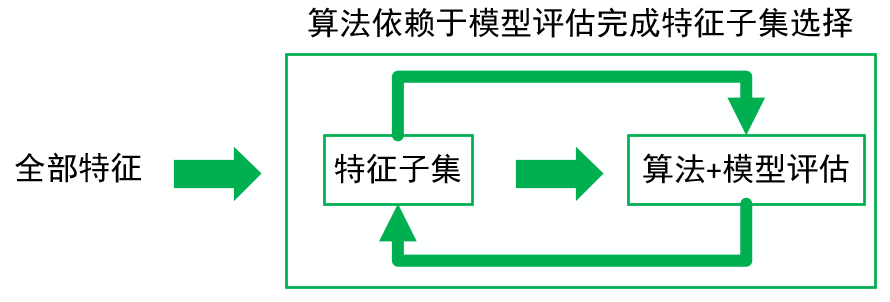

**核心函数**
* sklearn.feature_selection.SelectFromModel

**重要参数、属性与方法**
* estimator 使用模型的评估器，只要是带feature_importances_或coef_属性都可以使用
* threshold 用于选择特征的阈值，只有当特征的重要性高于此阈值时，才会被选入最终模型。

## 基于随机森林的权值系数

* SelectFromModel函数
* estimator 使用模型的评估器，只要是带feature_importances_或coef_属性，或带有L1和L2惩罚项的模型都可以使用
* threshold 特征重要性阈值，重要性低于这个阈值的特征将被删除

In [75]:
# 实例化随机森林模型
RFC_ = RFC(n_estimators=5, random_state=0)

In [76]:
# 使用SelectFromModel进行特征选择
selector = SelectFromModel(RFC_, threshold=0.0001)
X_embedded = selector.fit_transform(var_filtered_df, y_train.values.flatten())

# 选择的特征个数
print("Shape of features：{}".format(X_embedded.shape))

# 查看被选择的特征
selected_features = var_filtered_df.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

# 交叉验证结果
result = cross_val_score(RFC_, X_embedded, y_train.values.flatten(), cv=5).mean()
print(f"result of the first result:{result}")

Shape of features：(42, 17)
Selected features: Index(['original_gldm_LargeDependenceHighGrayLevelEmphasis',
       'wavelet-LLH_ngtdm_Strength', 'wavelet-HLL_firstorder_RootMeanSquared',
       'wavelet-HLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'wavelet-HLH_firstorder_Maximum',
       'wavelet-HLH_glrlm_LongRunLowGrayLevelEmphasis',
       'log-sigma-3-0-mm-3D_glcm_Autocorrelation',
       'log-sigma-3-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis',
       'log-sigma-3-0-mm-3D_glrlm_GrayLevelVariance',
       'log-sigma-5-0-mm-3D_firstorder_Mean', 'squareroot_firstorder_Median',
       'exponential_glrlm_ShortRunHighGrayLevelEmphasis',
       'exponential_glszm_GrayLevelNonUniformity',
       'lbp-3D-m2_firstorder_Kurtosis', 'lbp-3D-m2_glcm_SumAverage',
       'lbp-3D-m2_glrlm_LowGrayLevelRunEmphasis',
       'gradient_glszm_SizeZoneNonUniformityNormalized'],
      dtype='object')
result of the first result:0.8305555555555555


In [77]:
threshold = np.linspace(0,(RFC_.fit(var_filtered_df, y_train.values.flatten()).feature_importances_).max(),20)
threshold 

array([0.        , 0.00868421, 0.01736842, 0.02605263, 0.03473684,
       0.04342105, 0.05210526, 0.06078947, 0.06947368, 0.07815789,
       0.08684211, 0.09552632, 0.10421053, 0.11289474, 0.12157895,
       0.13026316, 0.13894737, 0.14763158, 0.15631579, 0.165     ])

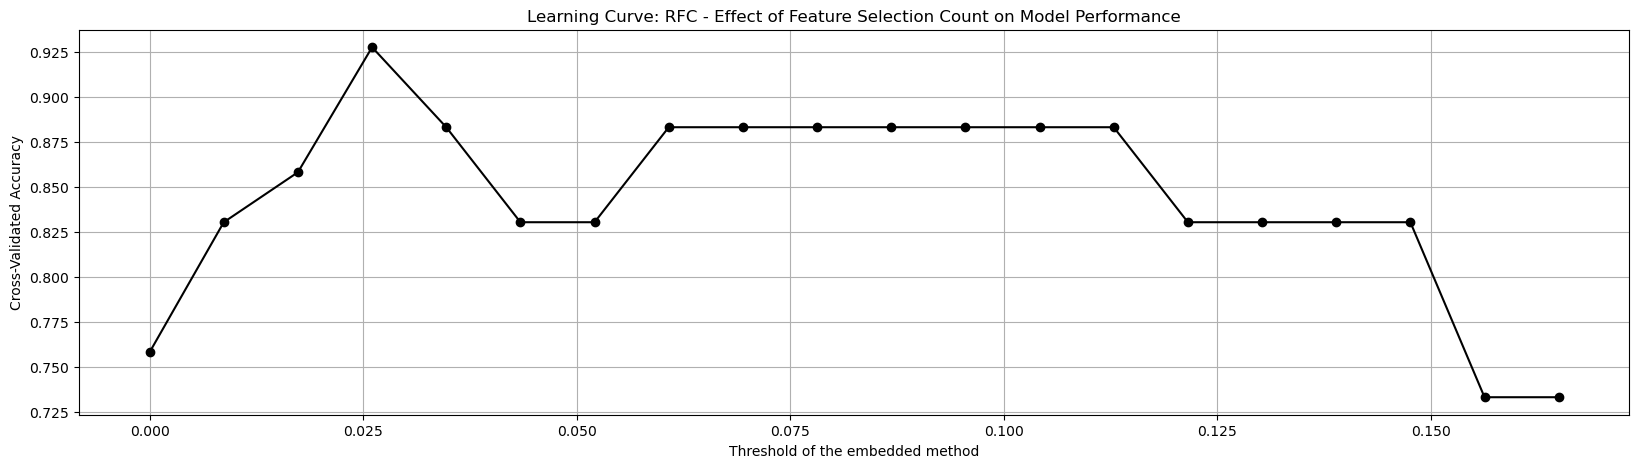

0.02605263157894737

In [78]:
scores = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_, threshold=i).fit_transform(var_filtered_df, y_train.values.flatten())
    score = cross_val_score(RFC_, X_embedded, y_train.values.flatten(), cv=5).mean()
    scores.append(score)

# 绘制学习曲线
plt.figure(figsize=[20, 5])
plt.plot(threshold, scores, marker='o',color='k')
plt.xlabel('Threshold of the embedded method')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Learning Curve: RFC - Effect of Feature Selection Count on Model Performance')
plt.grid(True)
plt.show()

max_score_index = np.argmax(scores)
optimal_threshold = threshold[max_score_index]

optimal_threshold

In [79]:
X_embedded = SelectFromModel(RFC_, threshold=0.02605263157894737).fit_transform(var_filtered_df, y_train.values.flatten())

In [80]:
cross_val_score(RFC_, X_embedded, y_train.values.flatten(), cv=5).mean()

0.9277777777777778

## 基于L1正则项（LASSO-Logistic回归）

In [81]:
# 实例化Lasso逻辑回归模型
lasso_logistic = LogisticRegression(penalty='l1', solver='liblinear', C=5, random_state=0, max_iter=10000)

# 使用交叉验证评估模型性能
scores = cross_val_score(lasso_logistic, mRMR_features, y_train.values.flatten(), cv=5)

# 打印平均得分
print(f"Lasso Logistic Regression average score: {scores.mean()}")

# 训练模型并查看选中的特征
lasso_logistic.fit(mRMR_features, y_train.values.flatten())
selected_features_mask = lasso_logistic.coef_[0] != 0  # 非零系数对应的特征被选中
selected_features = mRMR_features.columns[selected_features_mask]

print(f"Selected features by Lasso: {selected_features}")

Lasso Logistic Regression average score: 0.8055555555555556
Selected features by Lasso: Index(['lbp-3D-m1_firstorder_Variance',
       'original_glrlm_ShortRunHighGrayLevelEmphasis',
       'wavelet-LHL_firstorder_Skewness',
       'log-sigma-3-0-mm-3D_gldm_DependenceNonUniformity',
       'lbp-3D-m2_glrlm_LongRunLowGrayLevelEmphasis',
       'wavelet-HLL_glszm_SmallAreaLowGrayLevelEmphasis',
       'lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis',
       'log-sigma-3-0-mm-3D_glcm_SumSquares',
       'wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis',
       'lbp-3D-m2_glrlm_LongRunHighGrayLevelEmphasis'],
      dtype='object')


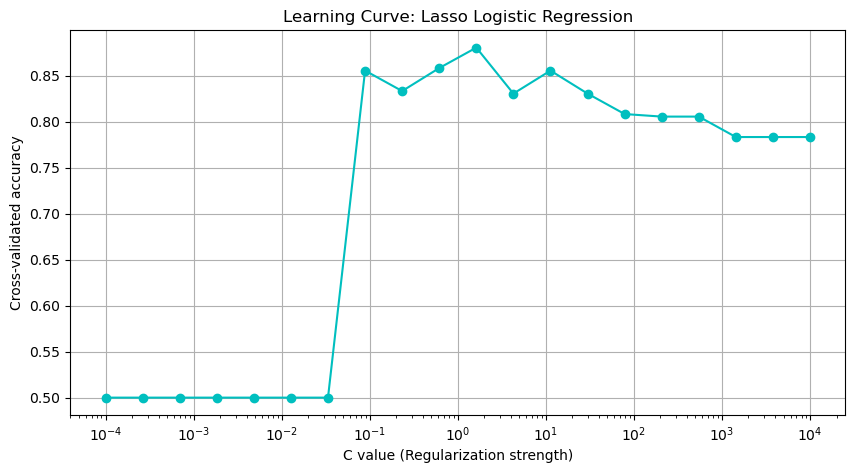

Optimal C value: 1.623776739188721


In [82]:
# 定义不同的C值（正则化强度的倒数）
C_values = np.logspace(-4, 4, 20)  # 创建一个在对数尺度上均匀分布的C值数组

scores = []  # 存储每个C值下的平均交叉验证得分

for C in C_values:
    # 实例化Lasso逻辑回归模型
    lasso_logistic = LogisticRegression(penalty='l1', C=C, solver='liblinear', random_state=0, max_iter=10000)
    
    # 使用交叉验证评估模型性能
    score = cross_val_score(lasso_logistic, mRMR_features, y_train.values.flatten(), cv=5).mean()
    scores.append(score)
    
# 绘制学习曲线
plt.figure(figsize=[10, 5])
plt.plot(C_values, scores, marker='o',color='c')
plt.xscale('log')  # 因为C值跨越了多个数量级，所以使用对数尺度
plt.xlabel('C value (Regularization strength)')
plt.ylabel('Cross-validated accuracy')
plt.title('Learning Curve: Lasso Logistic Regression')
plt.grid(True)
plt.show()

# 找到并打印最优的C值
max_score_index = np.argmax(scores)
optimal_C = C_values[max_score_index]
print(f"Optimal C value: {optimal_C}")

In [110]:
# 最优C值的交叉验证得分
lasso_logistic = LogisticRegression(penalty='l1', solver='liblinear', C=optimal_C, random_state=0, max_iter=10000)
scores = cross_val_score(lasso_logistic, mRMR_features, y_train.values.flatten(), cv=5)
print(f"Lasso Logistic Regression average score: {scores.mean():.4f}")

Lasso Logistic Regression average score: 0.8806


In [84]:
# 训练模型
lasso_logistic.fit(mRMR_features, y_train.values.flatten())

LogisticRegression(C=1.623776739188721, max_iter=10000, penalty='l1',
                   random_state=0, solver='liblinear')

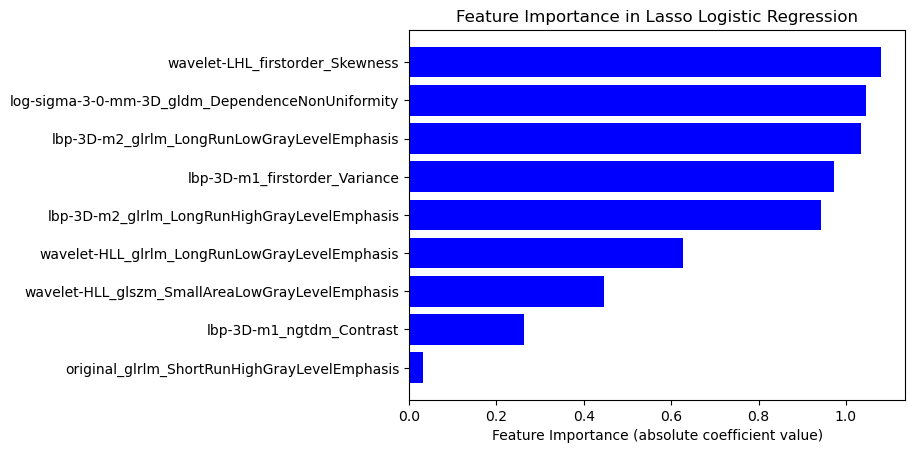

In [85]:
# 获取非零系数及其对应的特征名称
coefficients = lasso_logistic.coef_[0]
features = mRMR_features.columns
non_zero_indices = coefficients != 0
selected_features = features[non_zero_indices]
selected_coefficients = coefficients[non_zero_indices]

# 使用绝对值来表示特征的重要性
importance = np.abs(selected_coefficients)

# 创建特征重要性条形图
fig, ax = plt.subplots()
sorted_idx = np.argsort(importance)
ax.barh(range(len(importance)), importance[sorted_idx], color='blue')
ax.set_yticks(range(len(importance)))
ax.set_yticklabels(selected_features[sorted_idx])
ax.set_xlabel('Feature Importance (absolute coefficient value)')
ax.set_title('Feature Importance in Lasso Logistic Regression')
plt.show()

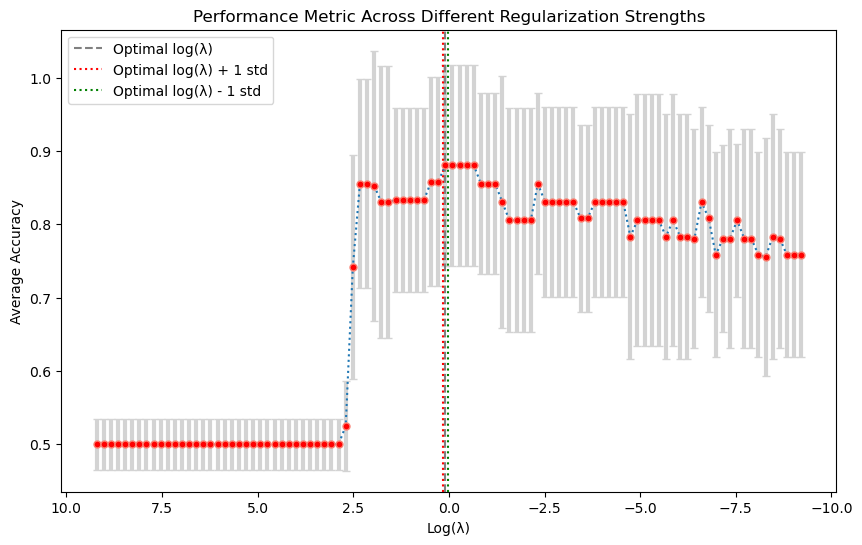

Optimal log(λ): 0.09303374113107217
Optimal log(λ) + 1 std: 0.16266341765509182
Optimal log(λ) - 1 std: 0.02340406460705252
Optimal C value: 0.9111627561154896
Optimal C value + 1 std: 0.849877193938505
Optimal C value - 1 std: 0.9768676863589866


In [108]:
# 实例化并训练逻辑回归CV模型，自动寻找最优C值
logisticCV = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=100, cv=5, random_state=0, max_iter=10000)
logisticCV.fit(mRMR_features, y_train.values.flatten())

# 获取模型的score（平均精度）和正则化强度（C值的倒数）
mean_scores = np.mean(logisticCV.scores_[1], axis=0)
std_scores = np.std(logisticCV.scores_[1], axis=0)
log_lambdas = np.log(1 / logisticCV.Cs_)

# 找到最优的C值及对应的索引
optimal_index = logisticCV.Cs_.tolist().index(logisticCV.C_)
optimal_log_lambda = log_lambdas[optimal_index]
optimal_score = mean_scores[optimal_index]

# 标准误差的调整
optimal_std = std_scores[optimal_index]
optimal_log_lambda_plus_std = optimal_log_lambda + optimal_std / (np.sqrt(5) * optimal_score)
optimal_log_lambda_minus_std = optimal_log_lambda - optimal_std / (np.sqrt(5) * optimal_score)

# 绘制平均分数对 log(λ) 的图
plt.figure(figsize=(10, 6))
plt.errorbar(log_lambdas, mean_scores, yerr=std_scores, fmt='o:', ecolor='lightgray', elinewidth=3, ms=5, mfc='red', mec='salmon', capsize=3)
plt.axvline(optimal_log_lambda, color='grey', ls='--', label='Optimal log(λ)')
plt.axvline(optimal_log_lambda_plus_std, color='red', ls=':', label='Optimal log(λ) + 1 std')
plt.axvline(optimal_log_lambda_minus_std, color='green', ls=':', label='Optimal log(λ) - 1 std')
plt.title('Performance Metric Across Different Regularization Strengths')
plt.xlabel('Log(λ)')
plt.ylabel('Average Accuracy')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

# 打印最优 log(λ) 和标准差调整后的值
print(f"Optimal log(λ): {optimal_log_lambda}")
print(f"Optimal log(λ) + 1 std: {optimal_log_lambda_plus_std}")
print(f"Optimal log(λ) - 1 std: {optimal_log_lambda_minus_std}")

# 计算对应的 C 值
optimal_C = 1 / np.exp(optimal_log_lambda)
optimal_C_plus_std = 1 / np.exp(optimal_log_lambda_plus_std)
optimal_C_minus_std = 1 / np.exp(optimal_log_lambda_minus_std)
print(f"Optimal C value: {optimal_C}")
print(f"Optimal C value + 1 std: {optimal_C_plus_std}")
print(f"Optimal C value - 1 std: {optimal_C_minus_std}")

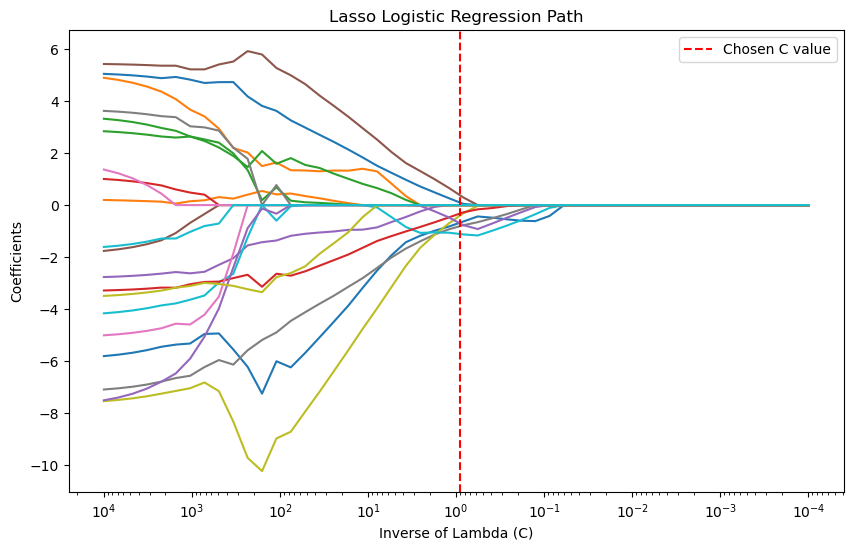

In [115]:
# 准备一个C值的范围（这里使用对数空间来获得不同数量级的C值）
C_values = np.logspace(-4, 4, 50)

# 初始化记录系数的列表
coefs = []

for C in C_values:
    # 实例化并训练逻辑回归模型
    lasso_logistic = LogisticRegression(penalty='l1', solver='liblinear', C=C, random_state=0, max_iter=10000)
    lasso_logistic.fit(mRMR_features, y_train.values.flatten())
    # 记录系数
    coefs.append(lasso_logistic.coef_[0])

# 转换成NumPy数组方便绘图
coefs = np.array(coefs)

# 绘制λ值与系数的关系
plt.figure(figsize=(10, 6))
plt.plot(C_values, coefs)
plt.xscale('log')
plt.xlabel('Inverse of Lambda (C)')
plt.ylabel('Coefficients')
plt.title('Lasso Logistic Regression Path')
plt.axvline(x=optimal_C, color='red', linestyle='--', label='Chosen C value')
plt.legend()
plt.gca().invert_xaxis()  # 降序显示C值
plt.show()

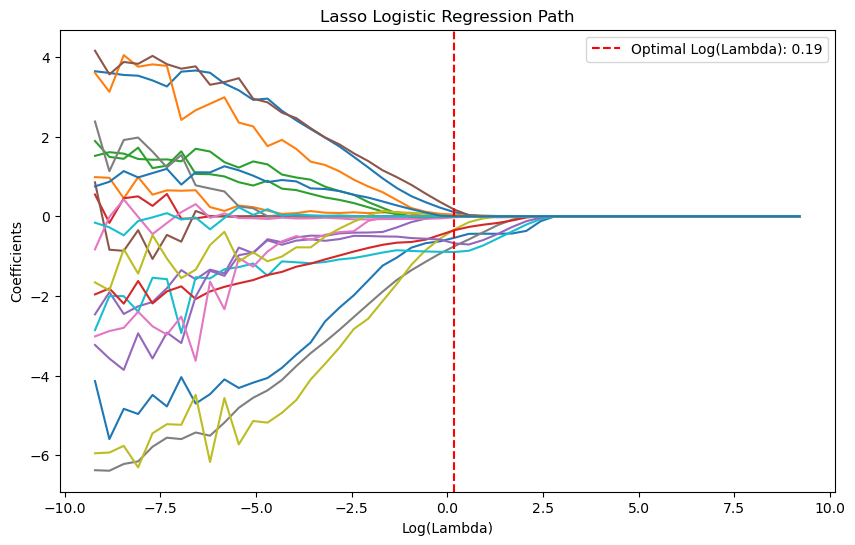

In [116]:
# 使用LogisticRegressionCV进行自动交叉验证，同时获取不同C值下的系数
logisticCV = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=np.logspace(-4, 4, 50), cv=5, random_state=0, max_iter=10000)
logisticCV.fit(mRMR_features, y_train.values.flatten())

# 获取系数
coefs = logisticCV.coefs_paths_[1]  # 1 是对应的类标签，适用于二分类问题; 对于多分类问题，可能需要调整这个索引

# 选择每个C值对应的系数平均值
mean_coefs = np.mean(coefs, axis=0)  # 取交叉验证的平均系数

# λ = 1/C
log_lambdas = np.log(1 / logisticCV.Cs_)

# 绘制正则化路径
plt.figure(figsize=(10, 6))
plt.plot(log_lambdas, mean_coefs)
plt.xlabel('Log(Lambda)')
plt.ylabel('Coefficients')
plt.title('Lasso Logistic Regression Path')
# 计算选中的C值对应的 log(λ)
optimal_log_lambda = np.log(1 / logisticCV.C_[0])
plt.axvline(x=optimal_log_lambda, color='red', linestyle='--', label=f'Optimal Log(Lambda): {optimal_log_lambda:.2f}')
plt.legend()
plt.show()
